In [69]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

pd.set_option('display.expand_frame_repr', False)

In [70]:
# Load the data
house = pd.read_csv('./housing.csv')

Perform EDA on the housing dataset

In [71]:
house.head(5)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [72]:
pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
#change pandas settings so that the whole dataset can be viewed

height has been deprecated.



In [73]:
house.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [74]:
house.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [75]:
house[house['TotalBsmtSF'] == 6110]
#this value contains the maximum value in the dataset for LotFrontage, BsmtFinSF1, TotalBsmtSF, 1stFlrSF, 
#GrLivArea, Fireplaces and GarageArea and was built and sold in 2008. However, the sale price is less than the
#mean sale price from the dataset. For this reason, I will remove this entry.
house = house[house.TotalBsmtSF != 6110]

In [76]:
house[house['GrLivArea'] == 4676]
house = house[house.GrLivArea != 4676]

In [77]:
house.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1458.000000,1458.000000,1199.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1450.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.00000,1458.000000,1458.000000,1458.000000,1458.000000,1377.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000
mean,730.251715,56.893004,69.797331,10459.936900,6.093964,5.576132,1971.218107,1984.834019,102.753793,438.827160,46.613169,567.096708,1052.537037,1158.851166,345.762003,5.852538,1510.465706,0.423868,0.057613,1.563786,0.38203,2.866255,1.046639,6.510974,0.611111,1978.464052,1.766118,472.050069,94.084362,46.245542,21.984225,3.414266,15.081619,2.433471,43.548697,6.323045,2007.816187,180932.919067
std,421.601532,42.329437,23.203458,9859.198156,1.376369,1.113359,30.193754,20.641760,179.442156,432.969094,161.420729,442.087187,414.982320,372.039498,435.423924,48.655960,507.878508,0.517404,0.238907,0.549891,0.50271,0.816323,0.220483,1.615880,0.641988,24.682879,0.747104,212.239248,125.350021,65.312932,61.155666,29.337173,55.792877,38.209947,496.460799,2.700167,1.328826,79495.055285
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.250000,20.000000,59.000000,7544.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.250000,882.000000,0.000000,0.000000,1128.500000,0.000000,0.000000,1.000000,0.00000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,331.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129925.000000
50%,730.500000,50.000000,69.000000,9475.000000,6.000000,5.000000,1972.500000,1994.000000,0.000000,382.000000,0.000000,477.500000,991.000000,1086.000000,0.000000,0.000000,1461.500000,0.000000,0.000000,2.000000,0.00000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,479.500000,0.000000,24.500000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1094.750000,70.000000,80.000000,11600.000000,7.000000,6.000000,2000.000000,2004.000000,164.750000,711.000000,0.000000,808.000000,1296.750000,1390.750000,728.000000,0.000000,1776.000000,1.000000,0.000000,2.000000,1.00000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,2188.000000,1474.000000,2336.000000,3206.000000,3228.000000,2065.000000,572.000000,4476.000000,3.000000,2.000000,3.000000,2.00000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1390.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [78]:
house.shape

(1458, 81)

In [79]:
house = house[house.MSZoning != "C (all)"]
house.MSZoning.value_counts()
# Drop rows where property is non-residential

RL    1149
RM     218
FV      65
RH      16
Name: MSZoning, dtype: int64

In [80]:
house.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1359
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [81]:
house['LotFrontage']=house['LotFrontage'].fillna(0)
house['Alley']=house['Alley'].fillna("None")
house['MasVnrType']=house['MasVnrType'].fillna("Non")
house['MasVnrArea']=house['MasVnrArea'].fillna(0.0)
house['BsmtQual']=house['BsmtQual'].fillna("No Basement")
house['BsmtCond']=house['BsmtCond'].fillna("No Basement")
house['BsmtExposure']=house['BsmtExposure'].fillna("No Basement")
house['BsmtFinType1']=house['BsmtFinType1'].fillna("No Basement")
house['BsmtFinType2']=house['BsmtFinType2'].fillna("No Basement")
house['Electrical']=house['Electrical'].fillna("SBrkr")
#assume circuit breaker because it is the vast majority
house['FireplaceQu']=house['FireplaceQu'].fillna("No Fireplace")
house['GarageType']=house['GarageType'].fillna("No Garage")
house['GarageFinish']=house['GarageFinish'].fillna("No Garage")
house['GarageQual']=house['GarageQual'].fillna("No Garage")
house['GarageCond']=house['GarageCond'].fillna("No Garage")
house['PoolQC']=house['PoolQC'].fillna("No Pool")
house['Fence']=house['Fence'].fillna("No Fence")
house['MiscFeature']=house['MiscFeature'].fillna("None")
#fill null values with the right values as per the data explanation

In [82]:
house.isnull().sum()

Id                0
MSSubClass        0
MSZoning          0
LotFrontage       0
LotArea           0
Street            0
Alley             0
LotShape          0
LandContour       0
Utilities         0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
MasVnrType        0
MasVnrArea        0
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual          0
BsmtCond          0
BsmtExposure      0
BsmtFinType1      0
BsmtFinSF1        0
BsmtFinType2      0
BsmtFinSF2        0
BsmtUnfSF         0
TotalBsmtSF       0
Heating           0
HeatingQC         0
CentralAir        0
Electrical        0
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      0
BsmtHalfBath      0
FullBath          0


In [83]:
#convert categorical variables into numeric using label encoding
from sklearn.preprocessing import LabelEncoder

ms_subclass = LabelEncoder()
house["MSZoning"] = ms_subclass.fit_transform(house["MSZoning"])
house["Street"] = ms_subclass.fit_transform(house["Street"])
house["Alley"] = ms_subclass.fit_transform(house["Alley"])
house["LotShape"] = ms_subclass.fit_transform(house["LotShape"])
house["LandContour"] = ms_subclass.fit_transform(house["LandContour"])
house["Utilities"] = ms_subclass.fit_transform(house["Utilities"])
house["LotConfig"] = ms_subclass.fit_transform(house["LotConfig"])
house["LandSlope"] = ms_subclass.fit_transform(house["LandSlope"])
house["Neighborhood"] = ms_subclass.fit_transform(house["Neighborhood"])
house["Condition1"] = ms_subclass.fit_transform(house["Condition1"])
house["Condition2"] = ms_subclass.fit_transform(house["Condition2"])
house["BldgType"] = ms_subclass.fit_transform(house["BldgType"])
house["HouseStyle"] = ms_subclass.fit_transform(house["HouseStyle"])
house["RoofStyle"] = ms_subclass.fit_transform(house["RoofStyle"])
house["RoofMatl"] = ms_subclass.fit_transform(house["RoofMatl"])
house["Exterior1st"] = ms_subclass.fit_transform(house["Exterior1st"])
house["Exterior2nd"] = ms_subclass.fit_transform(house["Exterior2nd"])
house["MasVnrType"] = ms_subclass.fit_transform(house["MasVnrType"])
house["ExterQual"] = ms_subclass.fit_transform(house["ExterQual"])
house["ExterCond"] = ms_subclass.fit_transform(house["ExterCond"])
house["Foundation"] = ms_subclass.fit_transform(house["Foundation"])
house["BsmtQual"] = ms_subclass.fit_transform(house["BsmtQual"])
house["BsmtCond"] = ms_subclass.fit_transform(house["BsmtCond"])
house["BsmtExposure"] = ms_subclass.fit_transform(house["BsmtExposure"])
house["BsmtFinType1"] = ms_subclass.fit_transform(house["BsmtFinType1"])
house["BsmtFinType2"] = ms_subclass.fit_transform(house["BsmtFinType2"])
house["Heating"] = ms_subclass.fit_transform(house["Heating"])
house["HeatingQC"] = ms_subclass.fit_transform(house["HeatingQC"])
house["CentralAir"] = ms_subclass.fit_transform(house["CentralAir"])
house["Electrical"] = ms_subclass.fit_transform(house["Electrical"])
house["KitchenQual"] = ms_subclass.fit_transform(house["KitchenQual"])
house["Functional"] = ms_subclass.fit_transform(house["Functional"])
house["FireplaceQu"] = ms_subclass.fit_transform(house["FireplaceQu"])
house["GarageType"] = ms_subclass.fit_transform(house["GarageType"])
house["GarageFinish"] = ms_subclass.fit_transform(house["GarageFinish"])
house["GarageQual"] = ms_subclass.fit_transform(house["GarageQual"])
house["GarageCond"] = ms_subclass.fit_transform(house["GarageCond"])
house["PavedDrive"] = ms_subclass.fit_transform(house["PavedDrive"])
house["PoolQC"] = ms_subclass.fit_transform(house["PoolQC"])
house["Fence"] = ms_subclass.fit_transform(house["Fence"])
house["MiscFeature"] = ms_subclass.fit_transform(house["MiscFeature"])
house["SaleType"] = ms_subclass.fit_transform(house["SaleType"])
house["SaleCondition"] = ms_subclass.fit_transform(house["SaleCondition"])



In [84]:
house.dtypes

Id                 int64
MSSubClass         int64
MSZoning           int64
LotFrontage      float64
LotArea            int64
Street             int64
Alley              int64
LotShape           int64
LandContour        int64
Utilities          int64
LotConfig          int64
LandSlope          int64
Neighborhood       int64
Condition1         int64
Condition2         int64
BldgType           int64
HouseStyle         int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle          int64
RoofMatl           int64
Exterior1st        int64
Exterior2nd        int64
MasVnrType         int64
MasVnrArea       float64
ExterQual          int64
ExterCond          int64
Foundation         int64
BsmtQual           int64
BsmtCond           int64
BsmtExposure       int64
BsmtFinType1       int64
BsmtFinSF1         int64
BsmtFinType2       int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating            int64


In [85]:
#split dataset into renovatable and fixed variables
fixed_house = house[['Neighborhood', 'YrSold', 'LotArea', 'MSZoning', 'LotFrontage', 'MSSubClass', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'BldgType', 'YearBuilt', 'TotRmsAbvGrd', 'GarageType', 'Condition1', 'Condition2', 'HouseStyle', 'RoofStyle', 'Foundation', 'BsmtQual', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GarageType', 'GarageArea', 'GarageCars', 'PavedDrive', 'FullBath', 'HalfBath', 'KitchenAbvGr','BsmtFullBath', 'BsmtHalfBath','SalePrice']]

In [86]:
fixed_house.head(5)

,Neighborhood,YrSold,LotArea,MSZoning,LotFrontage,MSSubClass,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,BldgType,YearBuilt,TotRmsAbvGrd,GarageType,Condition1,Condition2,HouseStyle,RoofStyle,Foundation,BsmtQual,TotalBsmtSF,1stFlrSF,2ndFlrSF,GarageType,GarageArea,GarageCars,PavedDrive,FullBath,HalfBath,KitchenAbvGr,BsmtFullBath,BsmtHalfBath,SalePrice
0,5,2008,8450,2,65.0,60,1,1,3,3,0,4,0,0,2003,8,1,2,2,5,1,2,2,856,856,854,1,548,2,2,2,1,1,1,0,208500
1,24,2007,9600,2,80.0,20,1,1,3,3,0,2,0,0,1976,6,1,1,2,2,1,1,2,1262,1262,0,1,460,2,2,2,0,1,0,1,181500
2,5,2008,11250,2,68.0,60,1,1,0,3,0,4,0,0,2001,6,1,2,2,5,1,2,2,920,920,866,1,608,2,2,2,1,1,1,0,223500
3,6,2006,9550,2,60.0,70,1,1,0,3,0,0,0,0,1915,7,5,2,2,5,1,0,4,756,961,756,5,642,3,2,1,0,1,1,0,140000
4,15,2008,14260,2,84.0,60,1,1,0,3,0,2,0,0,2000,9,1,2,2,5,1,2,2,1145,1145,1053,1,836,3,2,2,1,1,1,0,250000


In [87]:
reno_house = house[['OverallQual', 'OverallCond', 'YearRemodAdd', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'SalePrice']]
reno_house.head(5)

,OverallQual,OverallCond,YearRemodAdd,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageFinish,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,SalePrice
0,7,5,2003,0,12,13,1,2,4,4,3,2,6,1,0,1,4,2,6,0,3,2,5,5,0,61,0,0,0,0,3,4,1,208500
1,6,8,1976,0,8,8,3,3,4,4,1,0,6,1,0,1,4,3,6,1,5,2,5,5,298,0,0,0,0,0,3,4,1,181500
2,7,5,2002,0,12,13,1,2,4,4,2,2,6,1,0,1,4,2,6,1,5,2,5,5,0,42,0,0,0,0,3,4,1,223500
3,7,5,1970,0,13,15,3,3,4,1,3,0,6,1,2,1,4,2,6,1,2,3,5,5,0,35,272,0,0,0,3,4,1,140000
4,8,5,2000,0,12,13,1,2,4,4,0,2,6,1,0,1,4,2,6,1,5,2,5,5,192,84,0,0,0,0,3,4,1,250000


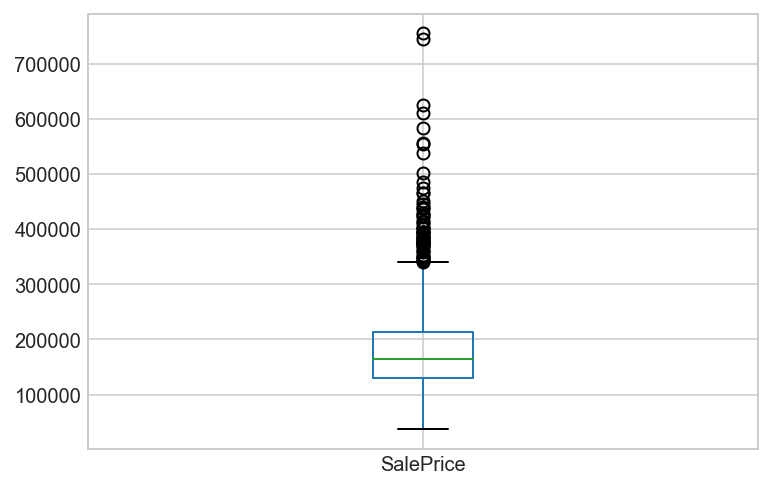

In [88]:
fixed_house.boxplot(column=['SalePrice'])

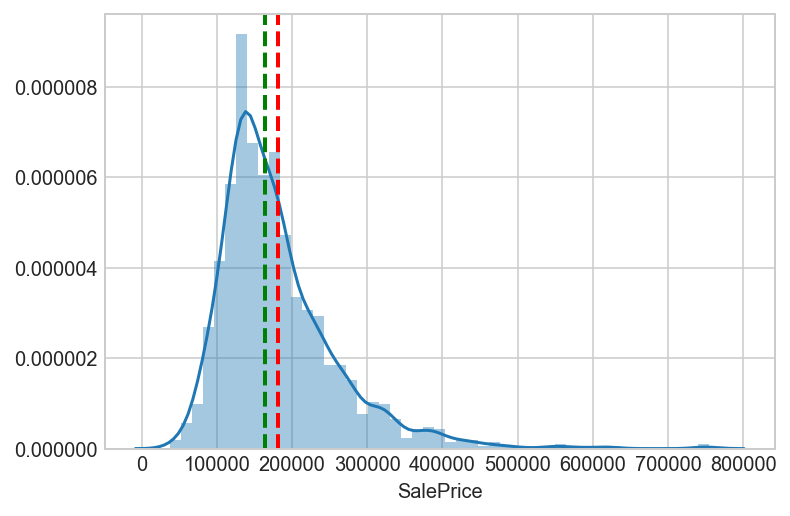

In [89]:
sns.distplot(fixed_house['SalePrice'])

plt.axvline(fixed_house['SalePrice'].mean(), color='r', linestyle='dashed', linewidth=2)
plt.axvline(fixed_house['SalePrice'].median(), color='g', linestyle='dashed', linewidth=2)

plt.show()


In [90]:
fixed_house.dtypes

Neighborhood      int64
YrSold            int64
LotArea           int64
MSZoning          int64
LotFrontage     float64
MSSubClass        int64
Street            int64
Alley             int64
LotShape          int64
LandContour       int64
Utilities         int64
LotConfig         int64
LandSlope         int64
BldgType          int64
YearBuilt         int64
TotRmsAbvGrd      int64
GarageType        int64
Condition1        int64
Condition2        int64
HouseStyle        int64
RoofStyle         int64
Foundation        int64
BsmtQual          int64
TotalBsmtSF       int64
1stFlrSF          int64
2ndFlrSF          int64
GarageType        int64
GarageArea        int64
GarageCars        int64
PavedDrive        int64
FullBath          int64
HalfBath          int64
KitchenAbvGr      int64
BsmtFullBath      int64
BsmtHalfBath      int64
SalePrice         int64
dtype: object

Text(0.5,1,'Sale Price vs Year Built')

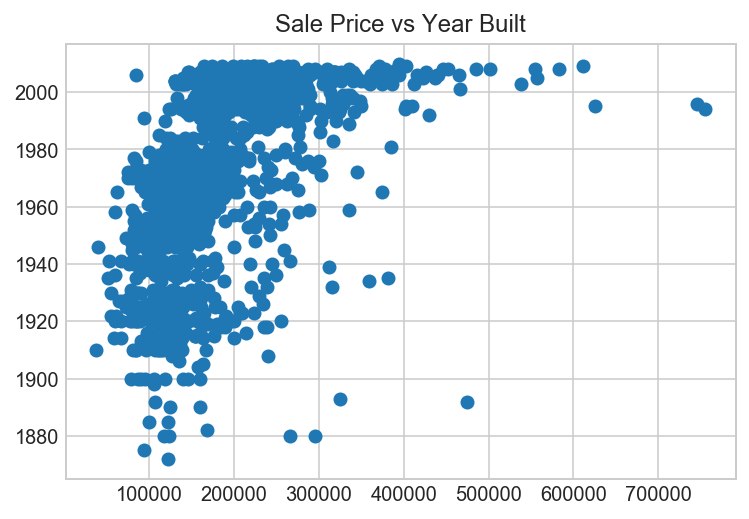

In [91]:
plt.scatter(fixed_house.SalePrice, fixed_house.YearBuilt)
plt.title("Sale Price vs Year Built")

Text(0.5,1,'Sale Price vs Neighbourhood')

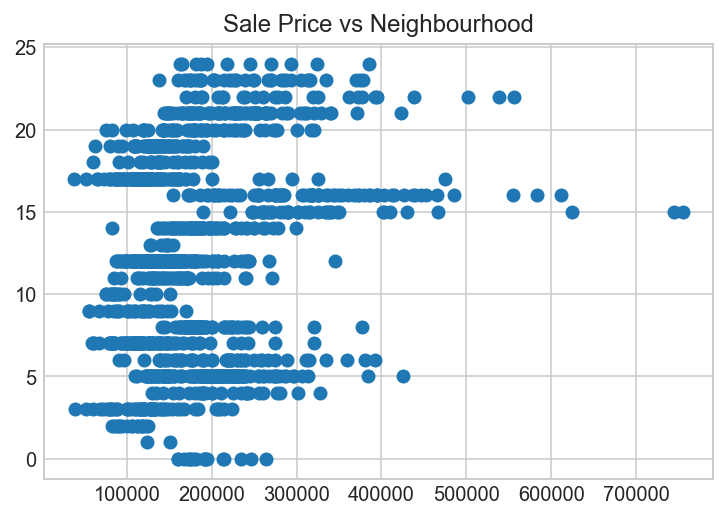

In [92]:
plt.scatter(fixed_house.SalePrice, fixed_house.Neighborhood)
plt.title("Sale Price vs Neighbourhood")

Text(0.5,1,'Sale Price vs Lot Area')

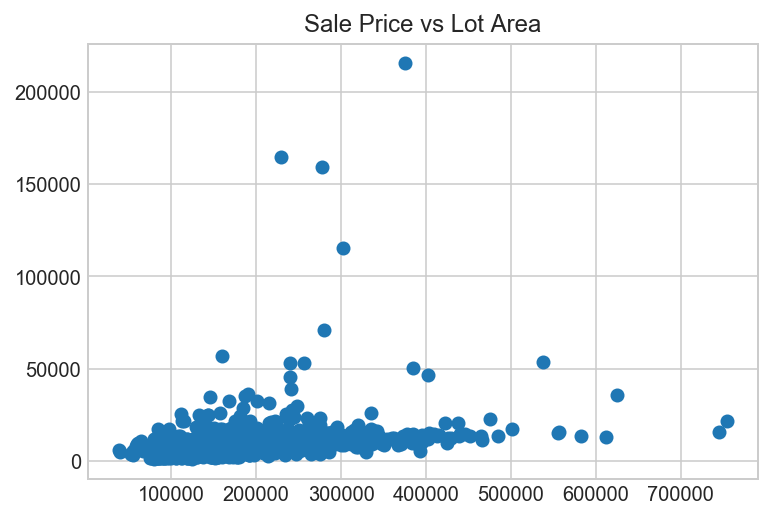

In [93]:
plt.scatter(fixed_house.SalePrice, fixed_house.LotArea)
plt.title("Sale Price vs Lot Area")

In [94]:
fixed_house.corr()

,Neighborhood,YrSold,LotArea,MSZoning,LotFrontage,MSSubClass,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,BldgType,YearBuilt,TotRmsAbvGrd,GarageType,Condition1,Condition2,HouseStyle,RoofStyle,Foundation,BsmtQual,TotalBsmtSF,1stFlrSF,2ndFlrSF,GarageType,GarageArea,GarageCars,PavedDrive,FullBath,HalfBath,KitchenAbvGr,BsmtFullBath,BsmtHalfBath,SalePrice
Neighborhood,1.000000,0.038584,0.050237,-0.287452,0.078187,-0.008898,-0.028160,0.042559,-0.038556,0.011839,0.046781,-0.035465,-0.078333,0.003897,0.099949,0.108721,-0.094998,-0.025840,0.026224,0.047071,0.112750,0.068404,-0.141201,0.164414,0.177726,0.029662,-0.094998,0.220539,0.194363,0.034904,0.136780,0.058035,0.061303,0.064630,-0.031673,0.208016
YrSold,0.038584,1.000000,-0.013019,-0.009415,-0.014077,-0.019335,-0.007425,0.010381,0.035566,0.025861,0.023525,-0.006666,-0.006709,0.003276,-0.008740,-0.031709,0.006331,-0.007910,-0.016320,-0.014137,0.018167,0.005647,0.022870,-0.013476,-0.011333,-0.026110,0.006331,-0.025299,-0.037408,0.020951,-0.017240,-0.006148,0.034450,0.071872,-0.044706,-0.025352
LotArea,0.050237,-0.013019,1.000000,-0.041283,0.071274,-0.141978,-0.237223,-0.029494,-0.165140,-0.130776,0.010393,-0.118169,0.450070,-0.206338,0.006170,0.175864,-0.149938,0.023643,0.006332,-0.040130,0.068564,-0.016560,-0.049660,0.224068,0.269700,0.041598,-0.149938,0.162352,0.151724,0.011316,0.119970,0.006791,-0.016017,0.147257,0.051159,0.269124
MSZoning,-0.287452,-0.009415,-0.041283,1.000000,-0.043723,0.038544,-0.018112,-0.375694,0.087033,-0.045116,-0.002246,-0.006875,0.007037,-0.005678,-0.397022,-0.061048,0.198233,-0.040062,0.034914,-0.140642,0.012492,-0.273325,0.212369,-0.125551,-0.092674,-0.061020,0.198233,-0.216836,-0.195040,-0.175845,-0.255095,-0.166634,0.063022,-0.042817,0.014305,-0.231783
LotFrontage,0.078187,-0.014077,0.071274,-0.043723,1.000000,-0.220393,-0.004543,-0.046490,0.169791,-0.040884,-0.044284,0.039644,-0.042430,-0.240975,0.033886,0.207671,-0.086161,-0.039049,-0.032729,-0.041306,0.110583,0.043281,-0.116796,0.188578,0.205745,0.034400,-0.086161,0.180782,0.166322,0.019983,0.118580,-0.019662,0.037139,-0.004252,-0.026661,0.220105
MSSubClass,-0.008898,-0.019335,-0.141978,0.038544,-0.220393,1.000000,-0.050542,0.100582,0.120106,-0.006271,-0.022943,0.081834,-0.023085,0.747966,0.029965,0.034669,0.134058,-0.024892,-0.044550,0.397622,-0.123174,0.062486,-0.082230,-0.257924,-0.267348,0.305384,0.134058,-0.101191,-0.042350,-0.066014,0.127911,0.178701,0.274907,0.004361,-0.011489,-0.087477
Street,-0.028160,-0.007425,-0.237223,-0.018112,-0.004543,-0.050542,1.000000,-0.001613,0.007037,0.078157,0.001384,0.033094,-0.180461,-0.032992,0.002269,0.033080,-0.007634,-0.088883,0.001578,0.015024,-0.005939,0.029113,-0.011574,-0.015371,-0.006337,0.036760,-0.007634,-0.009392,0.001367,-0.014950,0.030492,0.014016,0.011084,-0.083760,0.012659,0.013709
Alley,0.042559,0.010381,-0.029494,-0.375694,-0.046490,0.100582,-0.001613,1.000000,-0.046791,0.030522,0.000806,-0.011668,0.006801,0.165693,0.239739,-0.054063,-0.069119,0.078114,0.000919,0.054741,0.011608,0.164218,-0.094169,0.064409,0.031248,0.002626,-0.069119,0.062595,0.072839,0.123113,0.102893,0.078792,-0.031597,0.030615,-0.027709,0.092636
LotShape,-0.038556,0.035566,-0.165140,0.087033,0.169791,0.120106,0.007037,-0.046791,1.000000,0.087746,-0.036138,0.220139,-0.106537,0.117420,-0.222616,-0.116776,0.195509,-0.113900,-0.041225,-0.102624,0.005966,-0.134560,0.172085,-0.179169,-0.172149,-0.058636,0.195509,-0.164383,-0.184489,-0.113094,-0.154936,-0.108853,0.091650,-0.073857,-0.028560,-0.252858
LandContour,0.011839,0.025861,-0.130776,-0.045116,-0.040884,-0.006271,0.078157,0.030522,0.087746,1.000000,0.008131,-0.025662,-0.369265,0.047771,0.167035,-0.041280,-0.112715,0.028664,0.005362,0.077382,0.009166,0.064939,-0.027585,0.048460,-0.006141,-0.026533,-0.112715,0.071259,0.053292,0.134359,0.056253,0.035075,-0.043149,0.017127,0.016156,0.009328


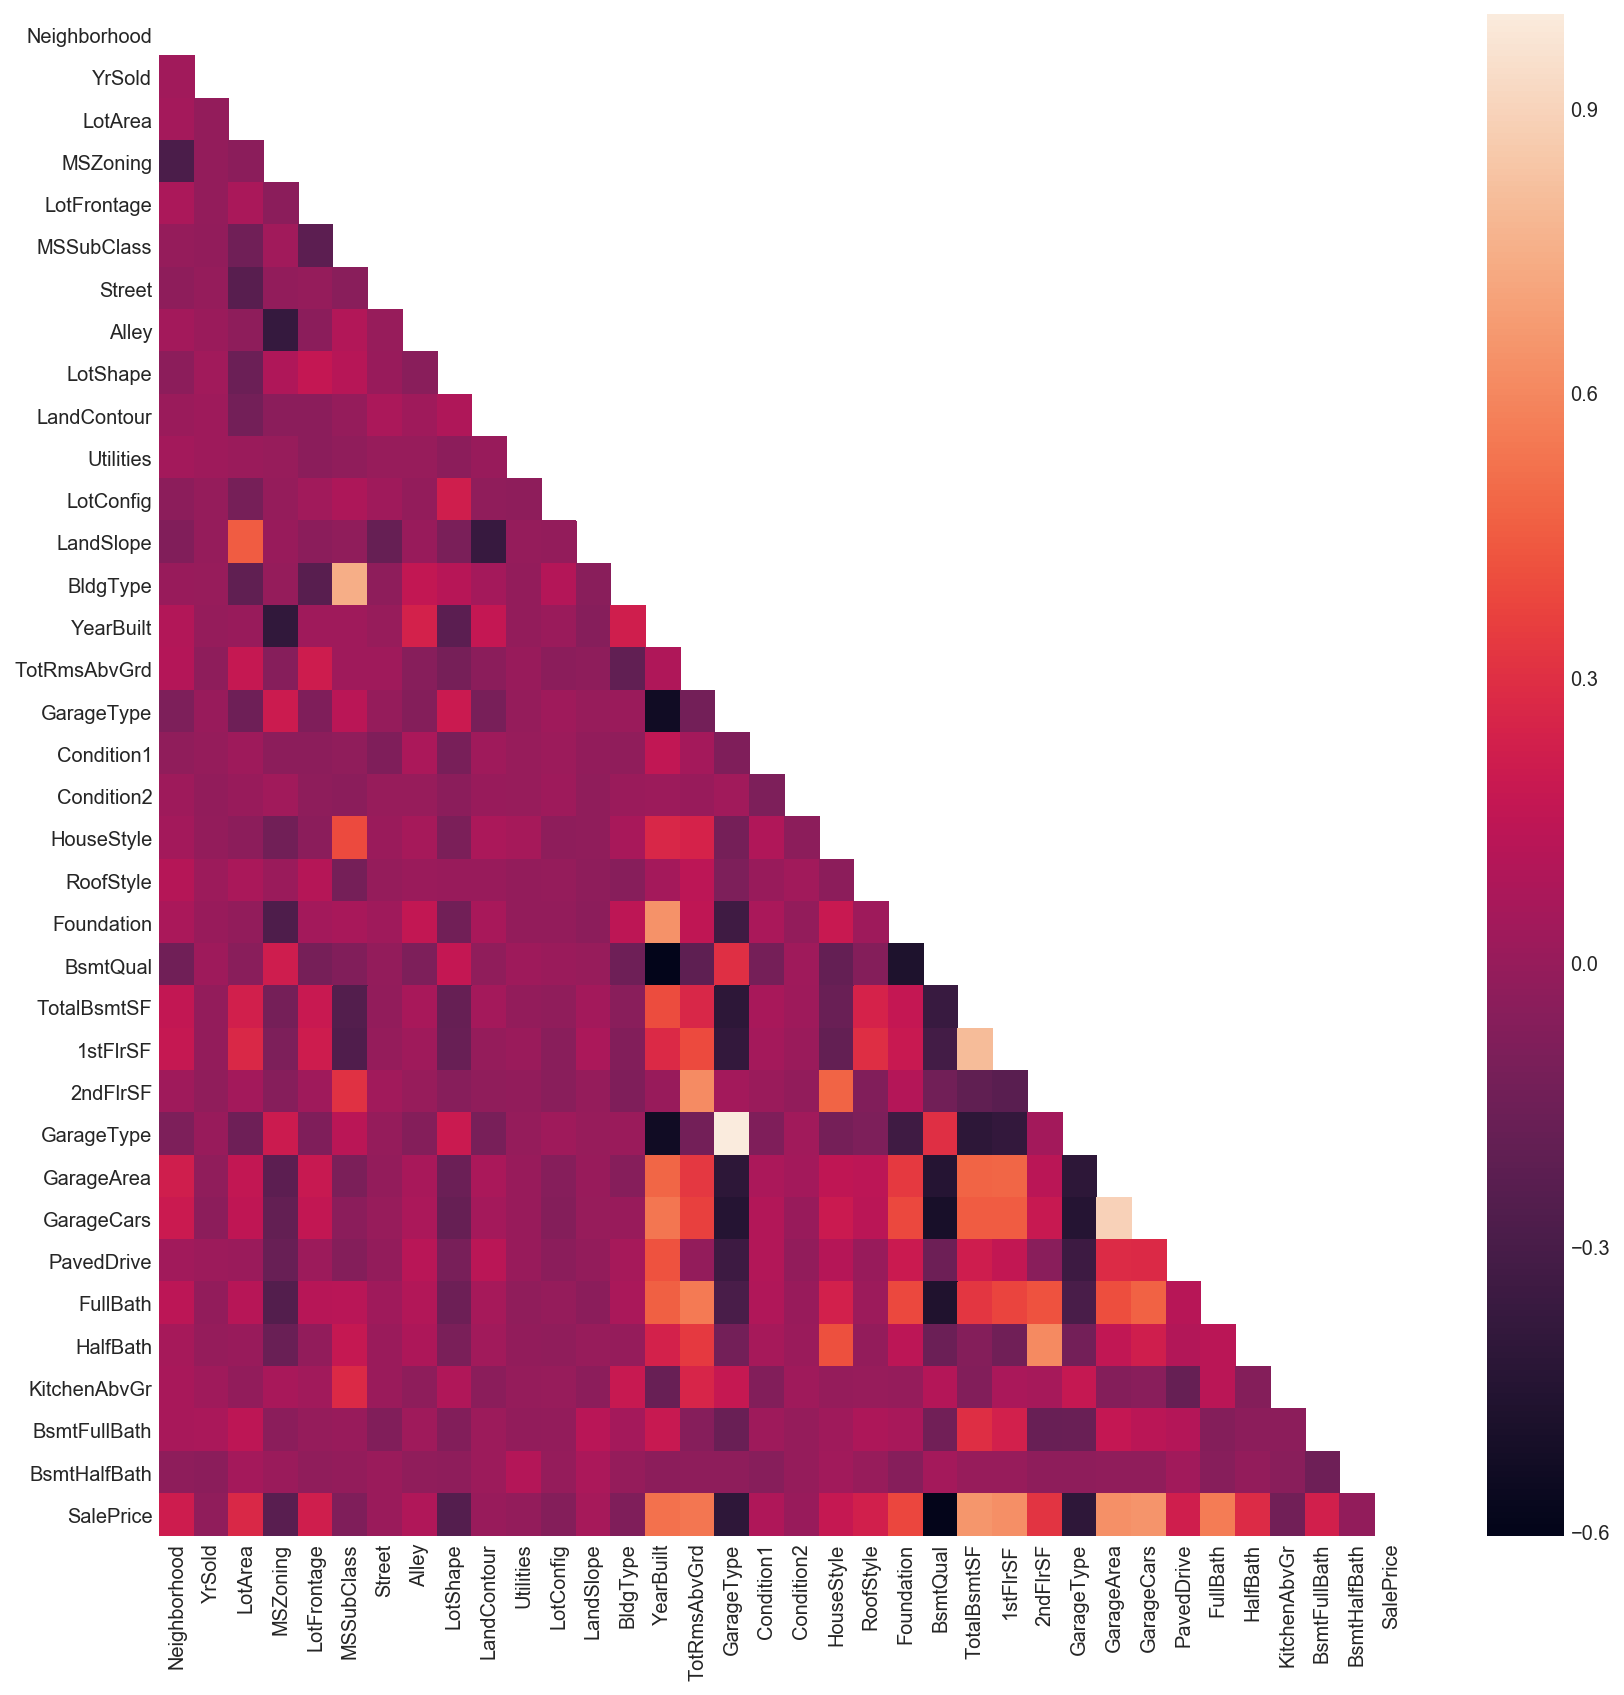

In [95]:
#Looking for correlations within the fixed dataset

fixed_house_corr = fixed_house.corr()

# Set the default matplotlib figure size to 7x7:
plt.rcParams['figure.figsize']=(14,14)

# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(fixed_house_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Plot the heatmap with seaborn.
# Assign the matplotlib axis the function returns. This will let us resize the labels.
ax = sns.heatmap(fixed_house_corr, mask=mask)

# Resize the labels.
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=10)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=10)

# If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
plt.show()

In [96]:
corr=house.corr()["SalePrice"]
corr[np.argsort(corr, axis=0)[::-1]]

SalePrice        1.000000
OverallQual      0.793918
GrLivArea        0.735293
TotalBsmtSF      0.649844
GarageCars       0.642792
GarageArea       0.635809
1stFlrSF         0.629119
FullBath         0.558195
TotRmsAbvGrd     0.537462
YearBuilt        0.518325
YearRemodAdd     0.501813
GarageYrBlt      0.486872
MasVnrArea       0.476290
Fireplaces       0.466220
BsmtFinSF1       0.407573
Foundation       0.383856
OpenPorchSF      0.335262
WoodDeckSF       0.321123
2ndFlrSF         0.321005
HalfBath         0.281377
LotArea          0.269124
GarageCond       0.242498
CentralAir       0.237920
RoofStyle        0.228334
Electrical       0.225723
BsmtFullBath     0.225412
PavedDrive       0.220456
LotFrontage      0.220105
BsmtUnfSF        0.216136
Neighborhood     0.208016
GarageQual       0.206241
SaleCondition    0.200777
HouseStyle       0.176468
BedroomAbvGr     0.162041
Fence            0.139107
RoofMatl         0.131938
Functional       0.118572
ExterCond        0.111714
ScreenPorch 

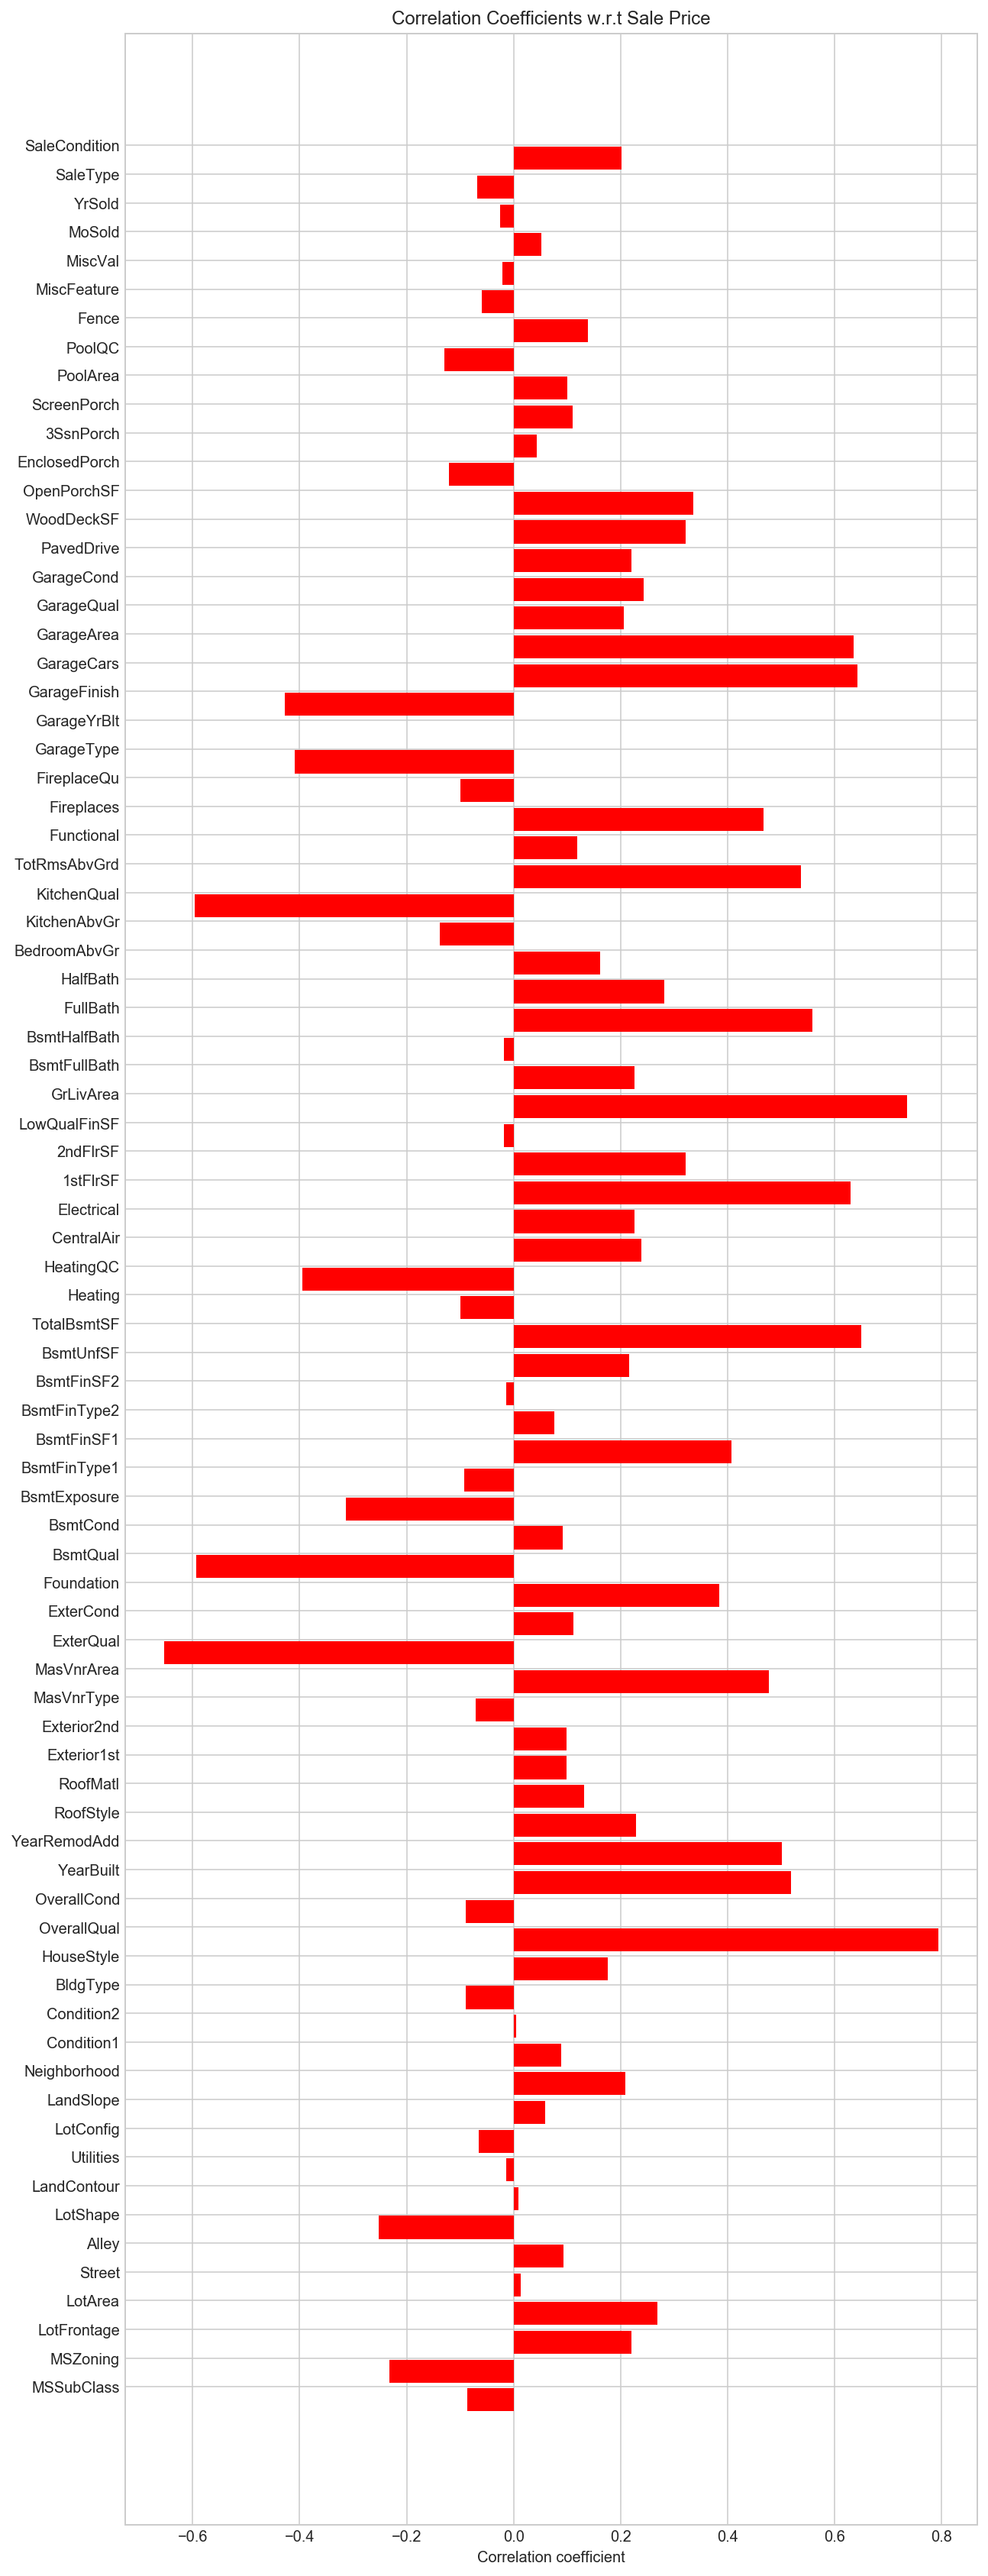

In [97]:
#plotting correlations

num_feat=house.columns[house.dtypes!=object]
num_feat=num_feat[1:-1] 
labels = []
values = []
for col in num_feat:
    labels.append(col)
    values.append(np.corrcoef(house[col].values, house.SalePrice.values)[0,1])
    
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(10,30))
rects = ax.barh(ind, np.array(values), color='red')
ax.set_yticks(ind+((width)/2.))
ax.set_yticklabels(labels, rotation='horizontal')
ax.set_xlabel("Correlation coefficient")
ax.set_title("Correlation Coefficients w.r.t Sale Price");

In [98]:
print(house.shape)
print(fixed_house.shape)

(1448, 81)
(1448, 36)


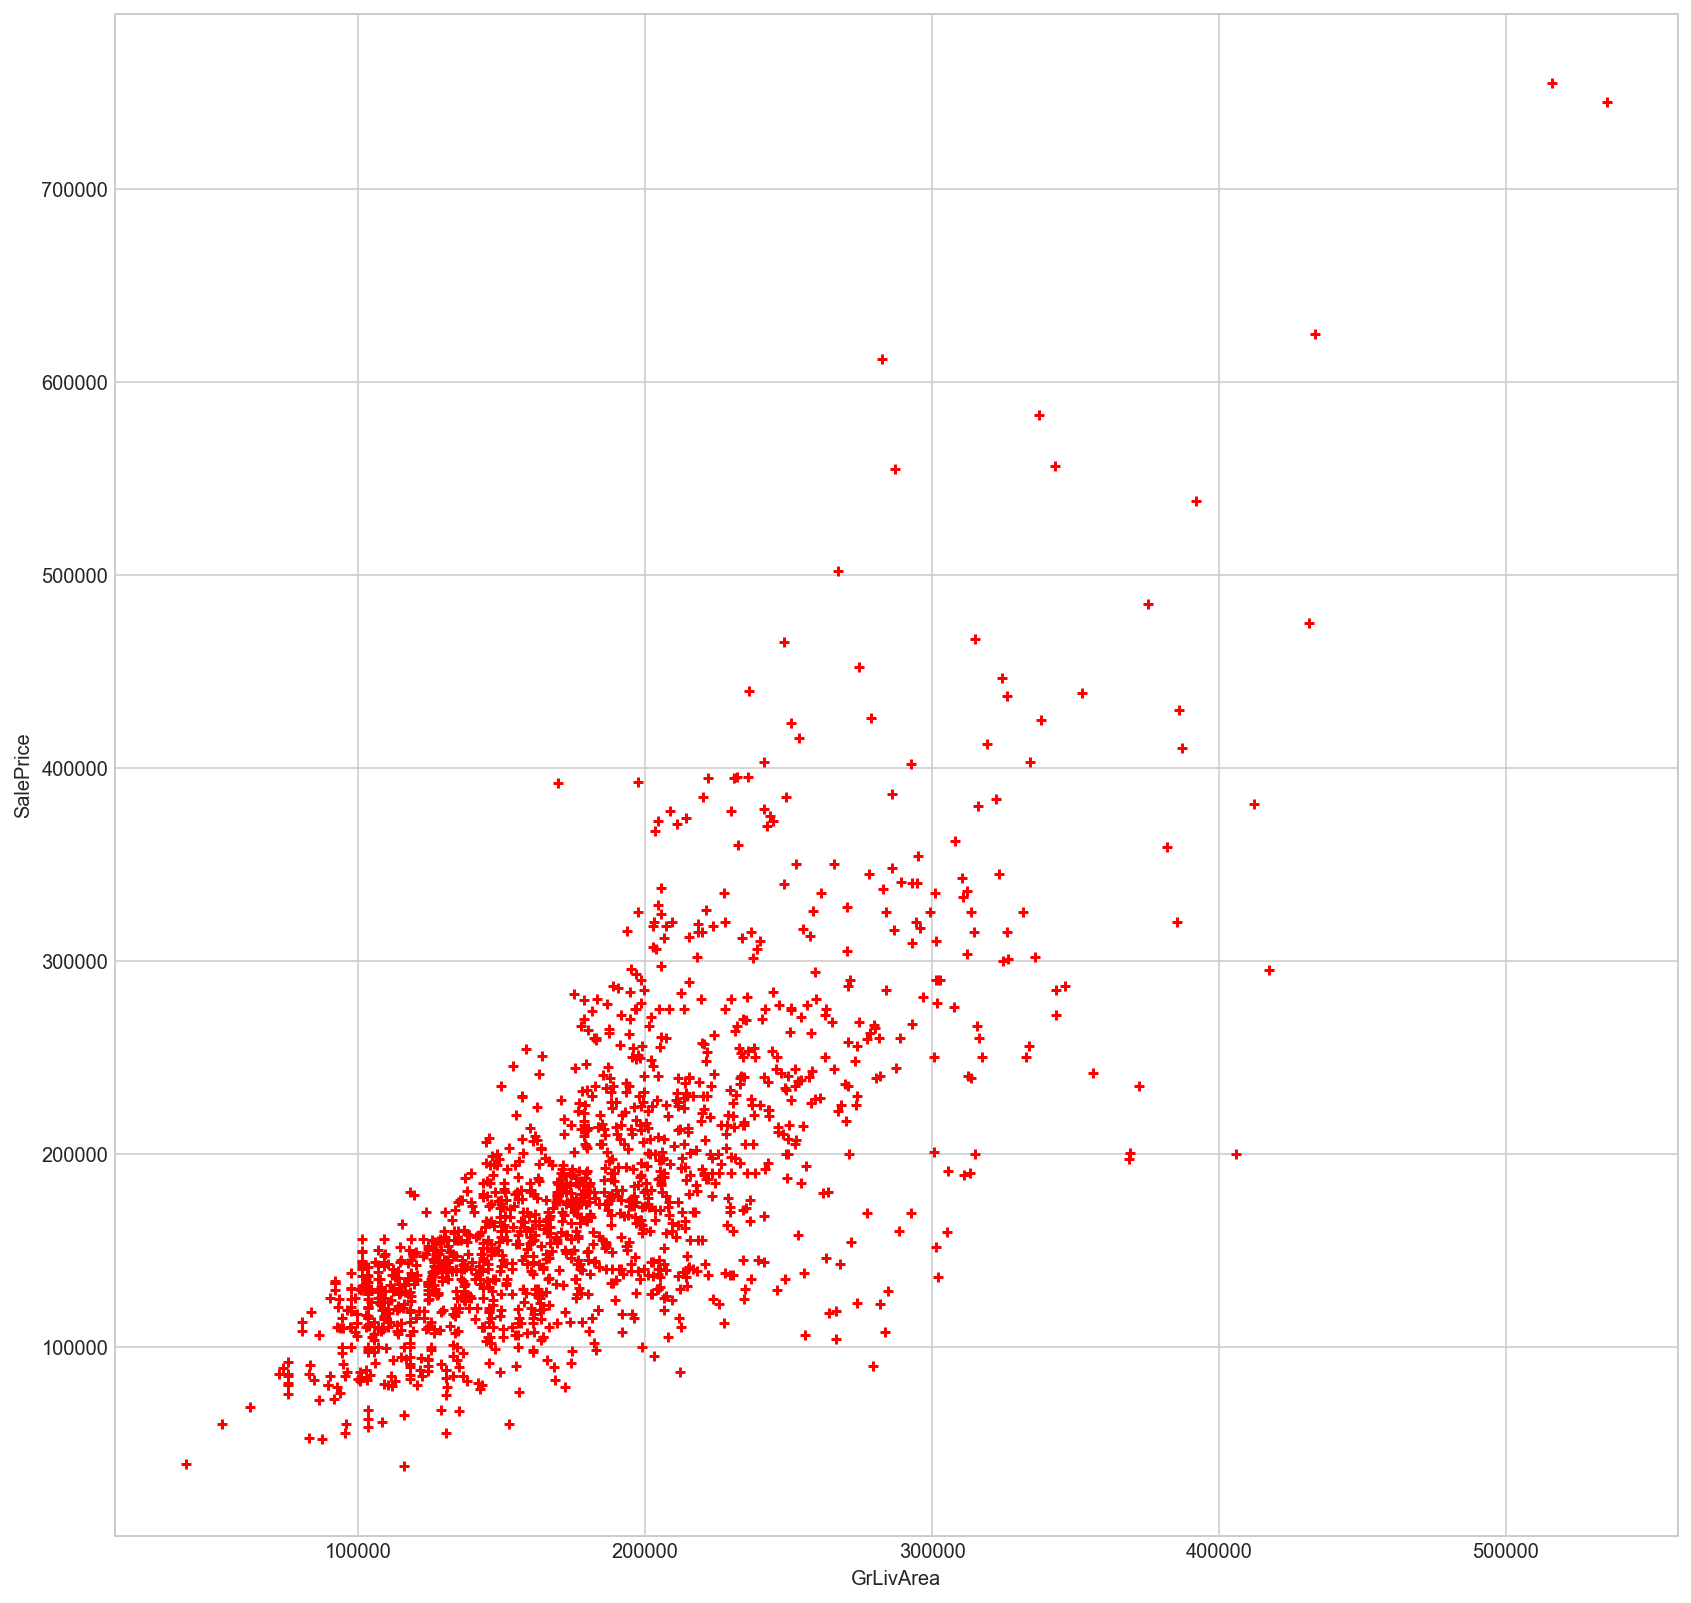

MSE: 2887903938.5
R^2: 0.926471703802


In [99]:
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

X_liv = house['GrLivArea']
y_liv = house['SalePrice']

model_liv = sm.OLS(y_liv, X_liv).fit()
predictions_liv = model_liv.predict(X_liv)


plt.scatter(predictions_liv, y_liv, s=25, c='r', marker='+', zorder=10)
plt.ylabel("SalePrice")
plt.xlabel('GrLivArea')
plt.show()

print ("MSE:", mean_squared_error(y_liv, predictions_liv))
print ('R^2:', model_liv.rsquared)

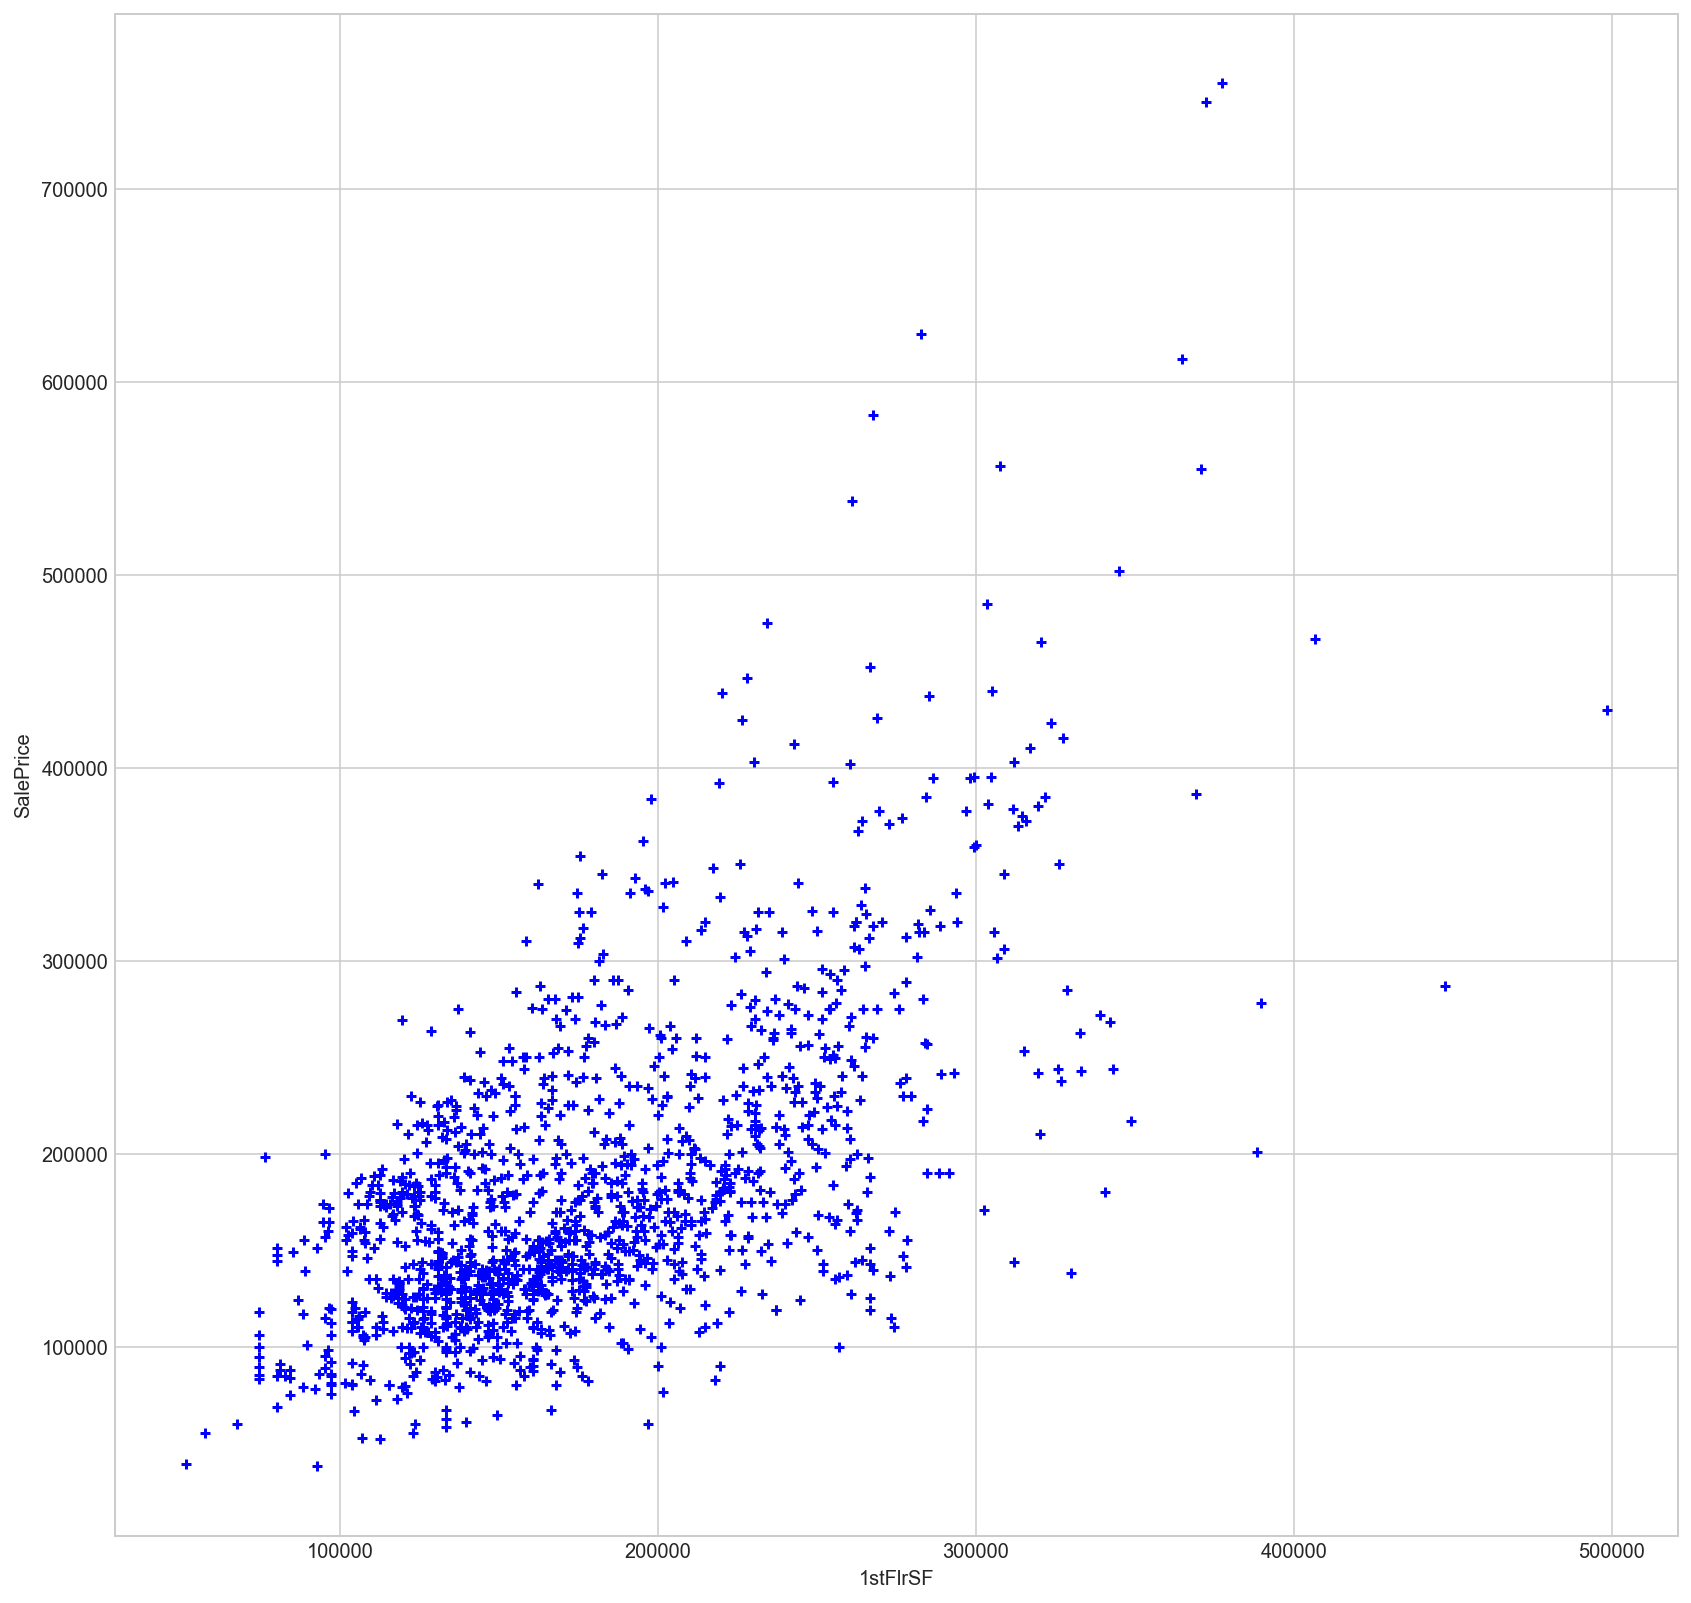

MSE: 3853628708.46
R^2: 0.901883594764


In [100]:
X_1stflr = house['1stFlrSF']
y_1stflr = house['SalePrice']

model_1stflr = sm.OLS(y_1stflr, X_1stflr).fit()
predictions_1stflr = model_1stflr.predict(X_1stflr)


plt.scatter(predictions_1stflr, y_1stflr, s=25, c='b', marker='+', zorder=10)
plt.ylabel("SalePrice")
plt.xlabel('1stFlrSF')
plt.show()

print ("MSE:", mean_squared_error(y_1stflr, predictions_1stflr))
print ('R^2:', model_1stflr.rsquared)

In [101]:
#correlation significance will equal +/- 0.5
#with respect to SalePrice, highest correlated variables are:
#Year Built, TotRmsAbvGrd, BsmtQual, TotalBsmtSF, 1stFlrSF, GarageArea, GarageCars, FullBath
#Collinearity - GarageCars with YearBuilt and GarageArea, drop GarageCars.
#Model will include YearBuilt, TotRmsAbvGrd, 1stFlrSF, GarageArea, FullBath, TotBsmtSF, LotArea
model_df = fixed_house[['YearBuilt', 'YrSold', 'LotArea', 'TotRmsAbvGrd', 'TotalBsmtSF', '1stFlrSF', 'GarageArea', 'FullBath', 'SalePrice']]

In [102]:
y = model_df.SalePrice.values
X = model_df.drop('SalePrice', axis=1)

In [103]:
train_X1=model_df[model_df['YrSold']<2010].drop('SalePrice', axis=1)
train_y1=fixed_house[fixed_house['YrSold']<2010]['SalePrice']
test_X1=model_df[model_df['YrSold']==2010].drop('SalePrice', axis=1)
test_y1=fixed_house[fixed_house['YrSold']==2010]['SalePrice']

In [104]:
from sklearn.model_selection import train_test_split

In [39]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler().fit(train_X1)
X_train_std = sc.transform(train_X1)
X_test_std = sc.transform(test_X1)

In [105]:
print (train_X1.shape, train_y1.shape)
print (test_X1.shape, test_y1.shape)
train_X1.head()

(1276, 8) (1276,)
(172, 8) (172,)


,YearBuilt,YrSold,LotArea,TotRmsAbvGrd,TotalBsmtSF,1stFlrSF,GarageArea,FullBath
0,2003,2008,8450,8,856,856,548,2
1,1976,2007,9600,6,1262,1262,460,2
2,2001,2008,11250,6,920,920,608,2
3,1915,2006,9550,7,756,961,642,1
4,2000,2008,14260,9,1145,1145,836,2


In [106]:
from sklearn.linear_model import LinearRegression

slr = LinearRegression()
slr.fit(train_X1, train_y1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [107]:
print (slr.score(train_X1, train_y1))

0.693268732806


In [108]:
print (slr.score(test_X1, test_y1))

0.756627624948


Cross-validated scores: [ 0.69830078  0.7209175   0.71763757  0.65971426  0.63512569]
Cross-Predicted R2: 0.689024225949


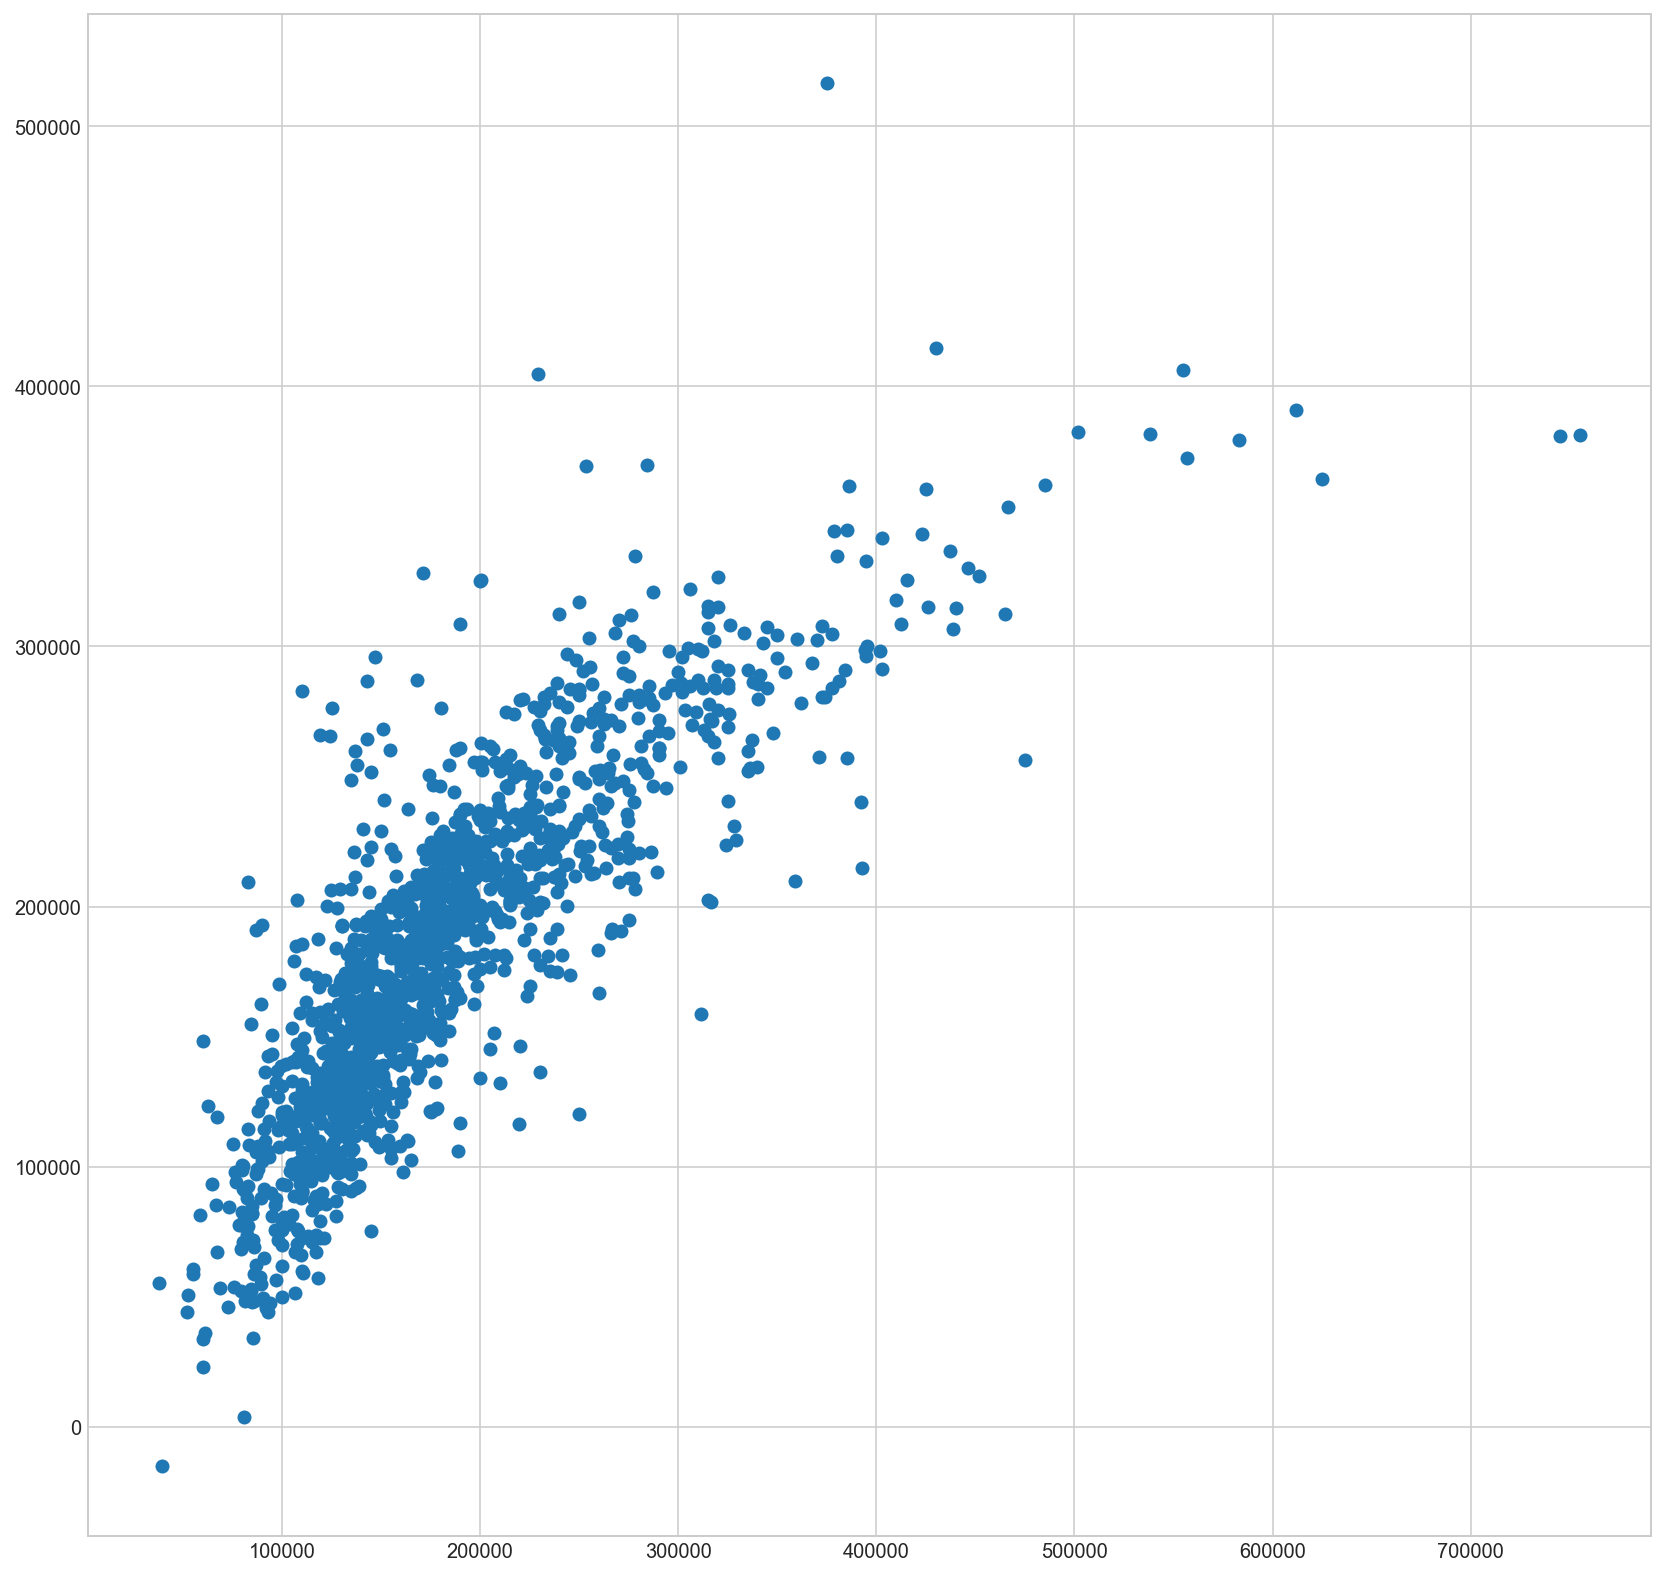

In [109]:
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics

# Perform 5-fold cross validation
scores = cross_val_score(slr, X, y, cv=5)
print ("Cross-validated scores:", scores)

# Make cross validated predictions on the test sets
predictions = cross_val_predict(slr, X, y, cv=5)
plt.scatter(y, predictions)

# manually calcualte the r2
r2 = metrics.r2_score(y, predictions)
print ("Cross-Predicted R2:", r2)

In [110]:
from sklearn import ensemble
clf = ensemble. GradientBoostingRegressor(n_estimators = 400, max_depth = 5, min_samples_split=2, learning_rate=0.1, loss='ls')

In [111]:
clf.fit(train_X1, train_y1)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=5, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=400, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [112]:
clf.score(test_X1, test_y1)

0.86018543450429141

In [113]:
from sklearn.metrics import mean_squared_error

print (np.sqrt(mean_squared_error(y, predictions)))

44167.0064239


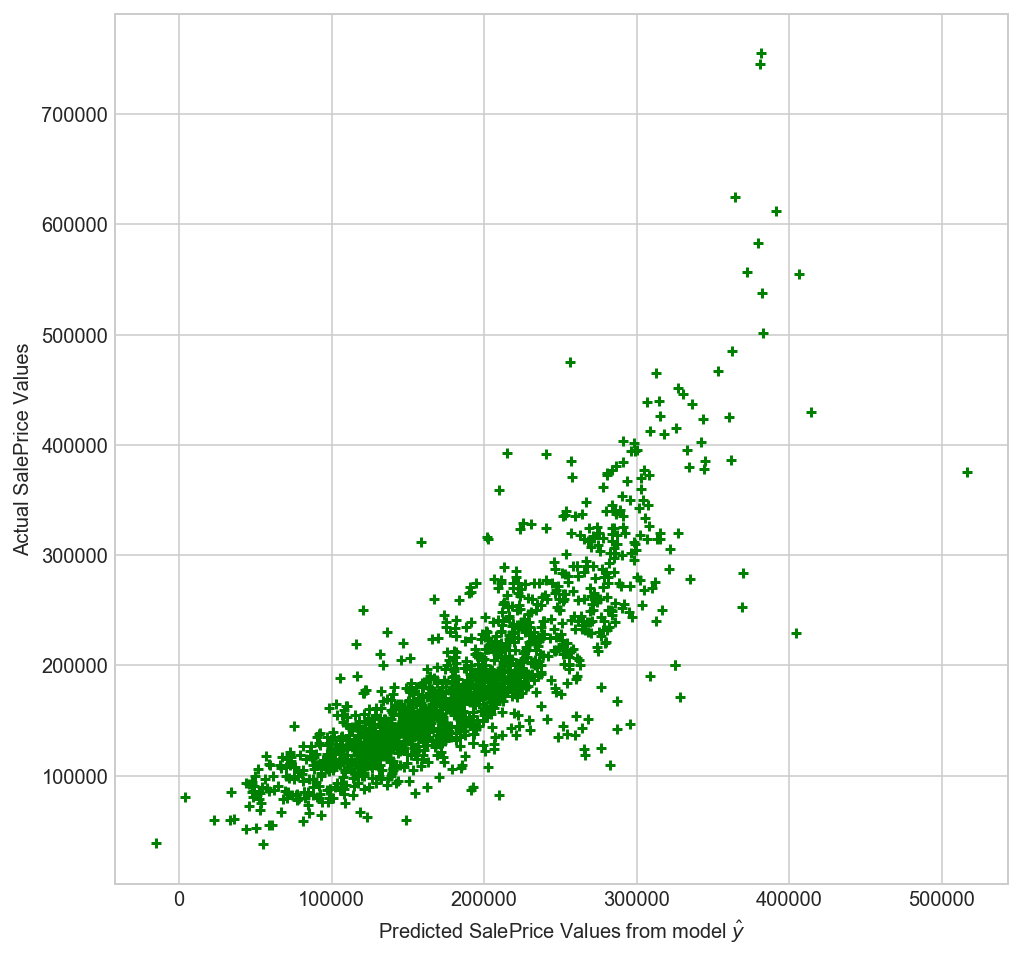

score:  <bound method RegressorMixin.score of GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=5, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=400, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)>


In [114]:
plt.figure(figsize=(8,8))
plt.scatter(predictions, y, s=30, c='g', marker='+', zorder=10)
plt.xlabel("Predicted SalePrice Values from model $\hat{y}$")
plt.ylabel("Actual SalePrice Values")
plt.show()

print ("score: ", clf.score)

# QUESTION 2



In [115]:
del reno_house['SalePrice']
# Create Residual feature 
reno_house['Residual']  = y - predictions

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [116]:
reno_house.head()

,OverallQual,OverallCond,YearRemodAdd,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageFinish,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,Residual
0,7,5,2003,0,12,13,1,2,4,4,3,2,6,1,0,1,4,2,6,0,3,2,5,5,0,61,0,0,0,0,3,4,1,-5039.749663
1,6,8,1976,0,8,8,3,3,4,4,1,0,6,1,0,1,4,3,6,1,5,2,5,5,298,0,0,0,0,0,3,4,1,-14083.058467
2,7,5,2002,0,12,13,1,2,4,4,2,2,6,1,0,1,4,2,6,1,5,2,5,5,0,42,0,0,0,0,3,4,1,25886.391538
3,7,5,1970,0,13,15,3,3,4,1,3,0,6,1,2,1,4,2,6,1,2,3,5,5,0,35,272,0,0,0,3,4,1,2459.636142
4,8,5,2000,0,12,13,1,2,4,4,0,2,6,1,0,1,4,2,6,1,5,2,5,5,192,84,0,0,0,0,3,4,1,-21414.768487


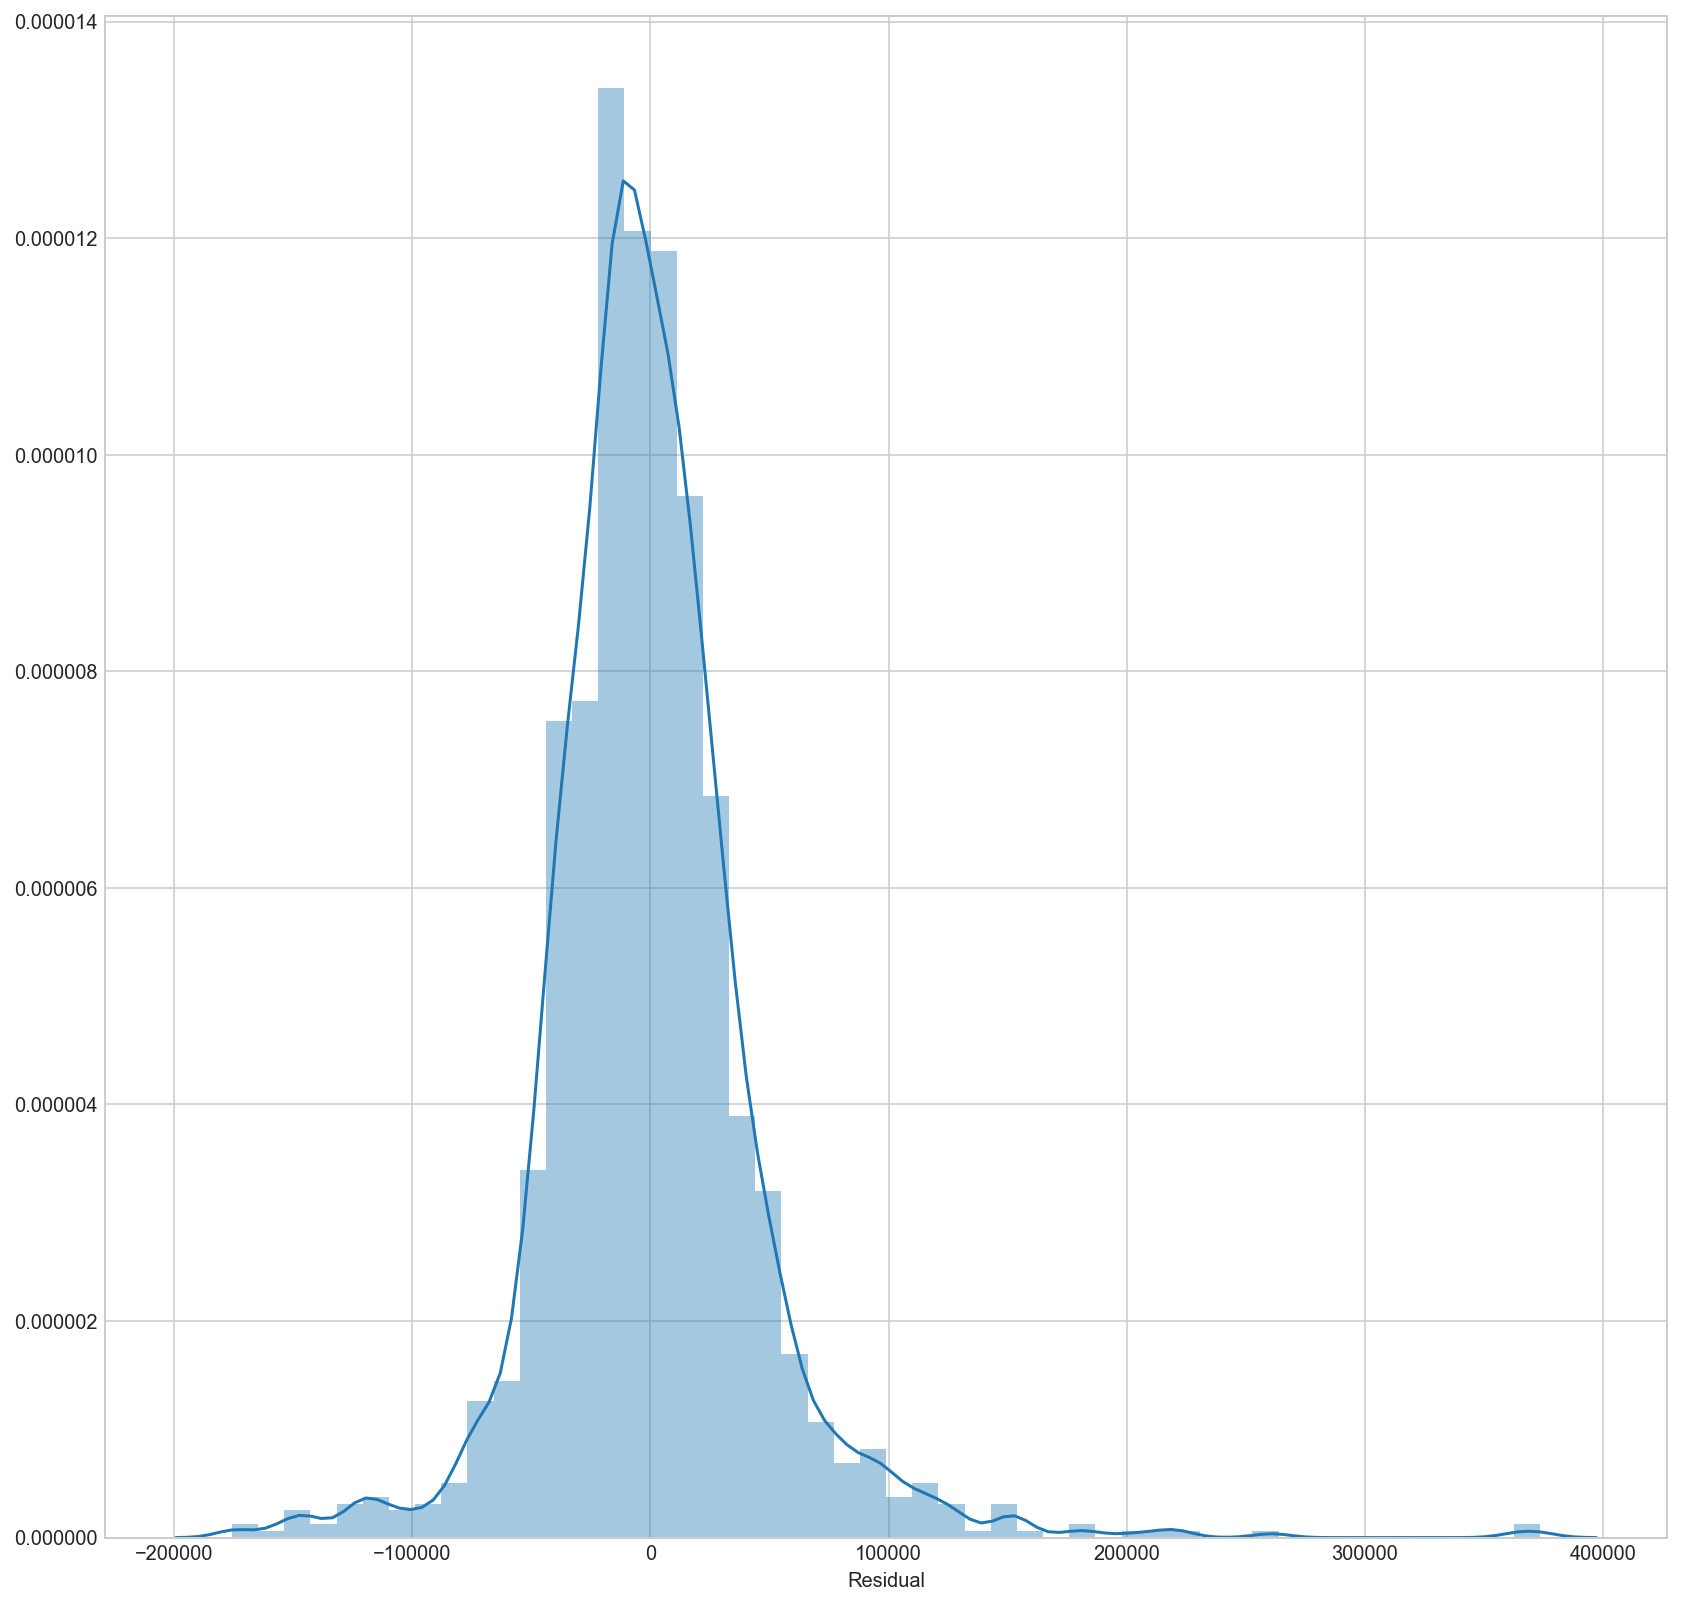

In [117]:
sns.distplot(reno_house.Residual)

In [118]:

residual = reno_house['Residual']
del reno_house['Residual']

In [119]:
import statsmodels.api as stats
X = reno_house
y = residual

# Add constant (beta0)
X = stats.add_constant(X) 

#Ordinary Least Squares model
model = stats.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Residual   R-squared:                       0.328
Model:                            OLS   Adj. R-squared:                  0.312
Method:                 Least Squares   F-statistic:                     20.90
Date:                Fri, 08 Dec 2017   Prob (F-statistic):           1.15e-98
Time:                        10:25:12   Log-Likelihood:                -17254.
No. Observations:                1448   AIC:                         3.458e+04
Df Residuals:                    1414   BIC:                         3.476e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          4.812e+05   1.44e+05      3.345      0.001    1.99e+05    7.63e+05
OverallQual    5818.2084   1159.780      5.017      0.000    3543.134    8093.283
OverallCond    1.142e+04    987.852     11.557      0.000    9479.000    1.34e+04
YearRemodAdd   -177.3807     68.933     -2.573      0.010    -312.604     -42.158
RoofMatl       3681.2030   1662.282      2.215      0.027     420.398    6942.008
Exterior1st    -655.2271    591.547     -1.108      0.268   -1815.631     505.177
Exterior2nd     482.1503    531.172      0.908      0.364    -559.820    1524.120
MasVnrType     3201.0098    963.050      3.324      0.001    1311.849    5090.171
ExterQual     -1.048e+04   2167.642     -4.837      0.000   -1.47e+04   -6232.017
ExterCond      -244.0497   1425.336     -0.171      0.864   -3040.050    2551.951
BsmtCond      -1182.9264   1093.523     -1.082      0.280   -3328.029     962.176
BsmtExposure   -283.0598    904.396     -0.313      0.754   -2057.162    1491.042
BsmtFinType1  -1528.1014    462.850     -3.302      0.001   -2436.048    -620.154
BsmtFinType2   1608.2514    838.634      1.918      0.055     -36.850    3253.353
Heating        2197.7577   3645.427      0.603      0.547   -4953.269    9348.784
HeatingQC     -1129.1149    692.570     -1.630      0.103   -2487.690     229.460
CentralAir    -4093.8705   4977.573     -0.822      0.411   -1.39e+04    5670.352
Electrical    -2344.6386   1047.051     -2.239      0.025   -4398.580    -290.697
KitchenQual   -8660.0452   1635.058     -5.296      0.000   -1.19e+04   -5452.644
Functional     3064.2952   1032.448      2.968      0.003    1039.001    5089.589
Fireplaces     5654.8477   1744.670      3.241      0.001    2232.428    9077.268
FireplaceQu    -576.0033    876.036     -0.658      0.511   -2294.473    1142.466
GarageFinish  -2023.9040    970.562     -2.085      0.037   -3927.799    -120.009
GarageQual    -3832.9619   1411.202     -2.716      0.007   -6601.237   -1064.687
GarageCond    -2302.7378   1631.752     -1.411      0.158   -5503.654     898.178
WoodDeckSF       13.0329      8.405      1.551      0.121      -3.455      29.520
OpenPorchSF       0.6482     16.181      0.040      0.968     -31.092      32.389
EnclosedPorch    34.0107     16.891      2.014      0.044       0.877      67.144
3SsnPorch         8.7897     33.064      0.266      0.790     -56.070      73.650
ScreenPorch      47.9501     18.154      2.641      0.008      12.338      83.563
PoolArea        -92.8931     55.531     -1.673      0.095    -201.825      16.039
PoolQC        -5.212e+04   1.54e+04     -3.389      0.001   -8.23e+04   -2.19e+04
Fence          -984.7536    962.429     -1.023      0.306   -2872.696     903.189
MiscFeature   -4088.7034   2714.760     -1.506      0.132   -9414.093    1236.686
=================================================

The model shows the dollar effect of all the renovatable elements of the dataset. The Coefficient illustrates the dollar value change in Residual of one unit change in the variable. The Rsquared is not high, so only 33% of the variance in Residual can be explained by the model.

However if we were to take the model at face value, the company could evaluate the coefficient of the variable and compare this to the price of the renovation to ascertain whether the renovation is worth the money. e.g. adding a fireplace to the house would only be a good idea if the cost of the renovation was less than $5655.

In [122]:
reno_house_2 = reno_house.drop(['Exterior1st','Exterior2nd', 'ExterCond', 'BsmtCond', 'Heating', 'CentralAir', '3SsnPorch'], axis=1)

In [123]:
X2 = reno_house_2
y = residual

# Add constant (beta0)
X2 = stats.add_constant(X2) 

#Ordinary Least Squares model
model = stats.OLS(y, X2).fit()
predictions = model.predict(X2)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Residual   R-squared:                       0.326
Model:                            OLS   Adj. R-squared:                  0.313
Method:                 Least Squares   F-statistic:                     26.39
Date:                Fri, 08 Dec 2017   Prob (F-statistic):          1.55e-102
Time:                        10:26:26   Log-Likelihood:                -17257.
No. Observations:                1448   AIC:                         3.457e+04
Df Residuals:                    1421   BIC:                         3.471e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          5.021e+05   1.41e+05      3.564      0.000    2.26e+05    7.78e+05
OverallQual    5646.3148   1145.702      4.928      0.000    3398.865    7893.764
OverallCond    1.134e+04    949.631     11.946      0.000    9481.207    1.32e+04
YearRemodAdd   -189.5778     67.205     -2.821      0.005    -321.409     -57.747
RoofMatl       3696.6614   1658.033      2.230      0.026     444.205    6949.118
MasVnrType     3281.5367    959.879      3.419      0.001    1398.604    5164.470
ExterQual     -1.072e+04   2151.545     -4.981      0.000   -1.49e+04   -6495.301
BsmtExposure   -130.4213    900.077     -0.145      0.885   -1896.043    1635.201
BsmtFinType1  -1507.2326    456.018     -3.305      0.001   -2401.774    -612.691
BsmtFinType2   1469.6145    831.503      1.767      0.077    -161.490    3100.719
HeatingQC     -1053.6592    678.450     -1.553      0.121   -2384.530     277.212
Electrical    -2761.0312   1020.821     -2.705      0.007   -4763.509    -758.553
KitchenQual   -8859.7440   1626.181     -5.448      0.000    -1.2e+04   -5669.771
Functional     2965.4088   1029.755      2.880      0.004     945.405    4985.412
Fireplaces     5594.6675   1735.370      3.224      0.001    2190.505    8998.830
FireplaceQu    -610.2671    874.236     -0.698      0.485   -2325.198    1104.664
GarageFinish  -1987.4444    967.778     -2.054      0.040   -3885.872     -89.017
GarageQual    -3905.6684   1398.553     -2.793      0.005   -6649.118   -1162.219
GarageCond    -2728.7086   1602.026     -1.703      0.089   -5871.299     413.882
WoodDeckSF       12.7620      8.381      1.523      0.128      -3.678      29.202
OpenPorchSF       2.0854     16.101      0.130      0.897     -29.498      33.669
EnclosedPorch    35.5881     16.817      2.116      0.034       2.600      68.577
ScreenPorch      47.9858     18.086      2.653      0.008      12.507      83.464
PoolArea        -92.2062     55.439     -1.663      0.096    -200.956      16.544
PoolQC        -5.139e+04   1.53e+04     -3.352      0.001   -8.15e+04   -2.13e+04
Fence          -931.3216    956.942     -0.973      0.331   -2808.492     945.849
MiscFeature   -4176.6643   2706.120     -1.543      0.123   -9485.083    1131.754
==============================================================================
Omnibus:                      209.962   Durbin-Watson:                   1.907
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1821.579
Skew:                           0.377   Prob(JB):                         0.00
Kurtosis:                       8.443   Cond. No.                     2.91e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.91e+05. T

## Question 3: Identifying Abnormal Sales

In [124]:
#Create boolean column to identify whether the sale condition was abnormal
house['Abnormal'] = house.SaleCondition.map(lambda x: 1 if x == 0 else 0)
house.head() 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Abnormal
0,1,60,2,65.0,8450,1,1,3,3,0,4,0,5,2,2,0,5,7,5,2003,2003,1,0,12,13,1,196.0,2,4,2,2,4,3,2,706,6,0,150,856,1,0,1,4,856,854,0,1710,1,0,2,1,3,1,2,8,6,0,3,1,2003.0,2,2,548,5,5,2,0,61,0,0,0,0,3,4,1,0,2,2008,8,4,208500,0
1,2,20,2,80.0,9600,1,1,3,3,0,2,0,24,1,2,0,2,6,8,1976,1976,1,0,8,8,3,0.0,3,4,1,2,4,1,0,978,6,0,284,1262,1,0,1,4,1262,0,0,1262,0,1,2,0,3,1,3,6,6,1,5,1,1976.0,2,2,460,5,5,2,298,0,0,0,0,0,3,4,1,0,5,2007,8,4,181500,0
2,3,60,2,68.0,11250,1,1,0,3,0,4,0,5,2,2,0,5,7,5,2001,2002,1,0,12,13,1,162.0,2,4,2,2,4,2,2,486,6,0,434,920,1,0,1,4,920,866,0,1786,1,0,2,1,3,1,2,6,6,1,5,1,2001.0,2,2,608,5,5,2,0,42,0,0,0,0,3,4,1,0,9,2008,8,4,223500,0
3,4,70,2,60.0,9550,1,1,0,3,0,0,0,6,2,2,0,5,7,5,1915,1970,1,0,13,15,3,0.0,3,4,0,4,1,3,0,216,6,0,540,756,1,2,1,4,961,756,0,1717,1,0,1,0,3,1,2,7,6,1,2,5,1998.0,3,3,642,5,5,2,0,35,272,0,0,0,3,4,1,0,2,2006,8,0,140000,1
4,5,60,2,84.0,14260,1,1,0,3,0,2,0,15,2,2,0,5,8,5,2000,2000,1,0,12,13,1,350.0,2,4,2,2,4,0,2,655,6,0,490,1145,1,0,1,4,1145,1053,0,2198,1,0,2,1,4,1,2,9,6,1,5,1,2000.0,2,3,836,5,5,2,192,84,0,0,0,0,3,4,1,0,12,2008,8,4,250000,0


In [125]:
house.Abnormal.value_counts()
#96 cases of abnormal sale

0    1352
1      96
Name: Abnormal, dtype: int64

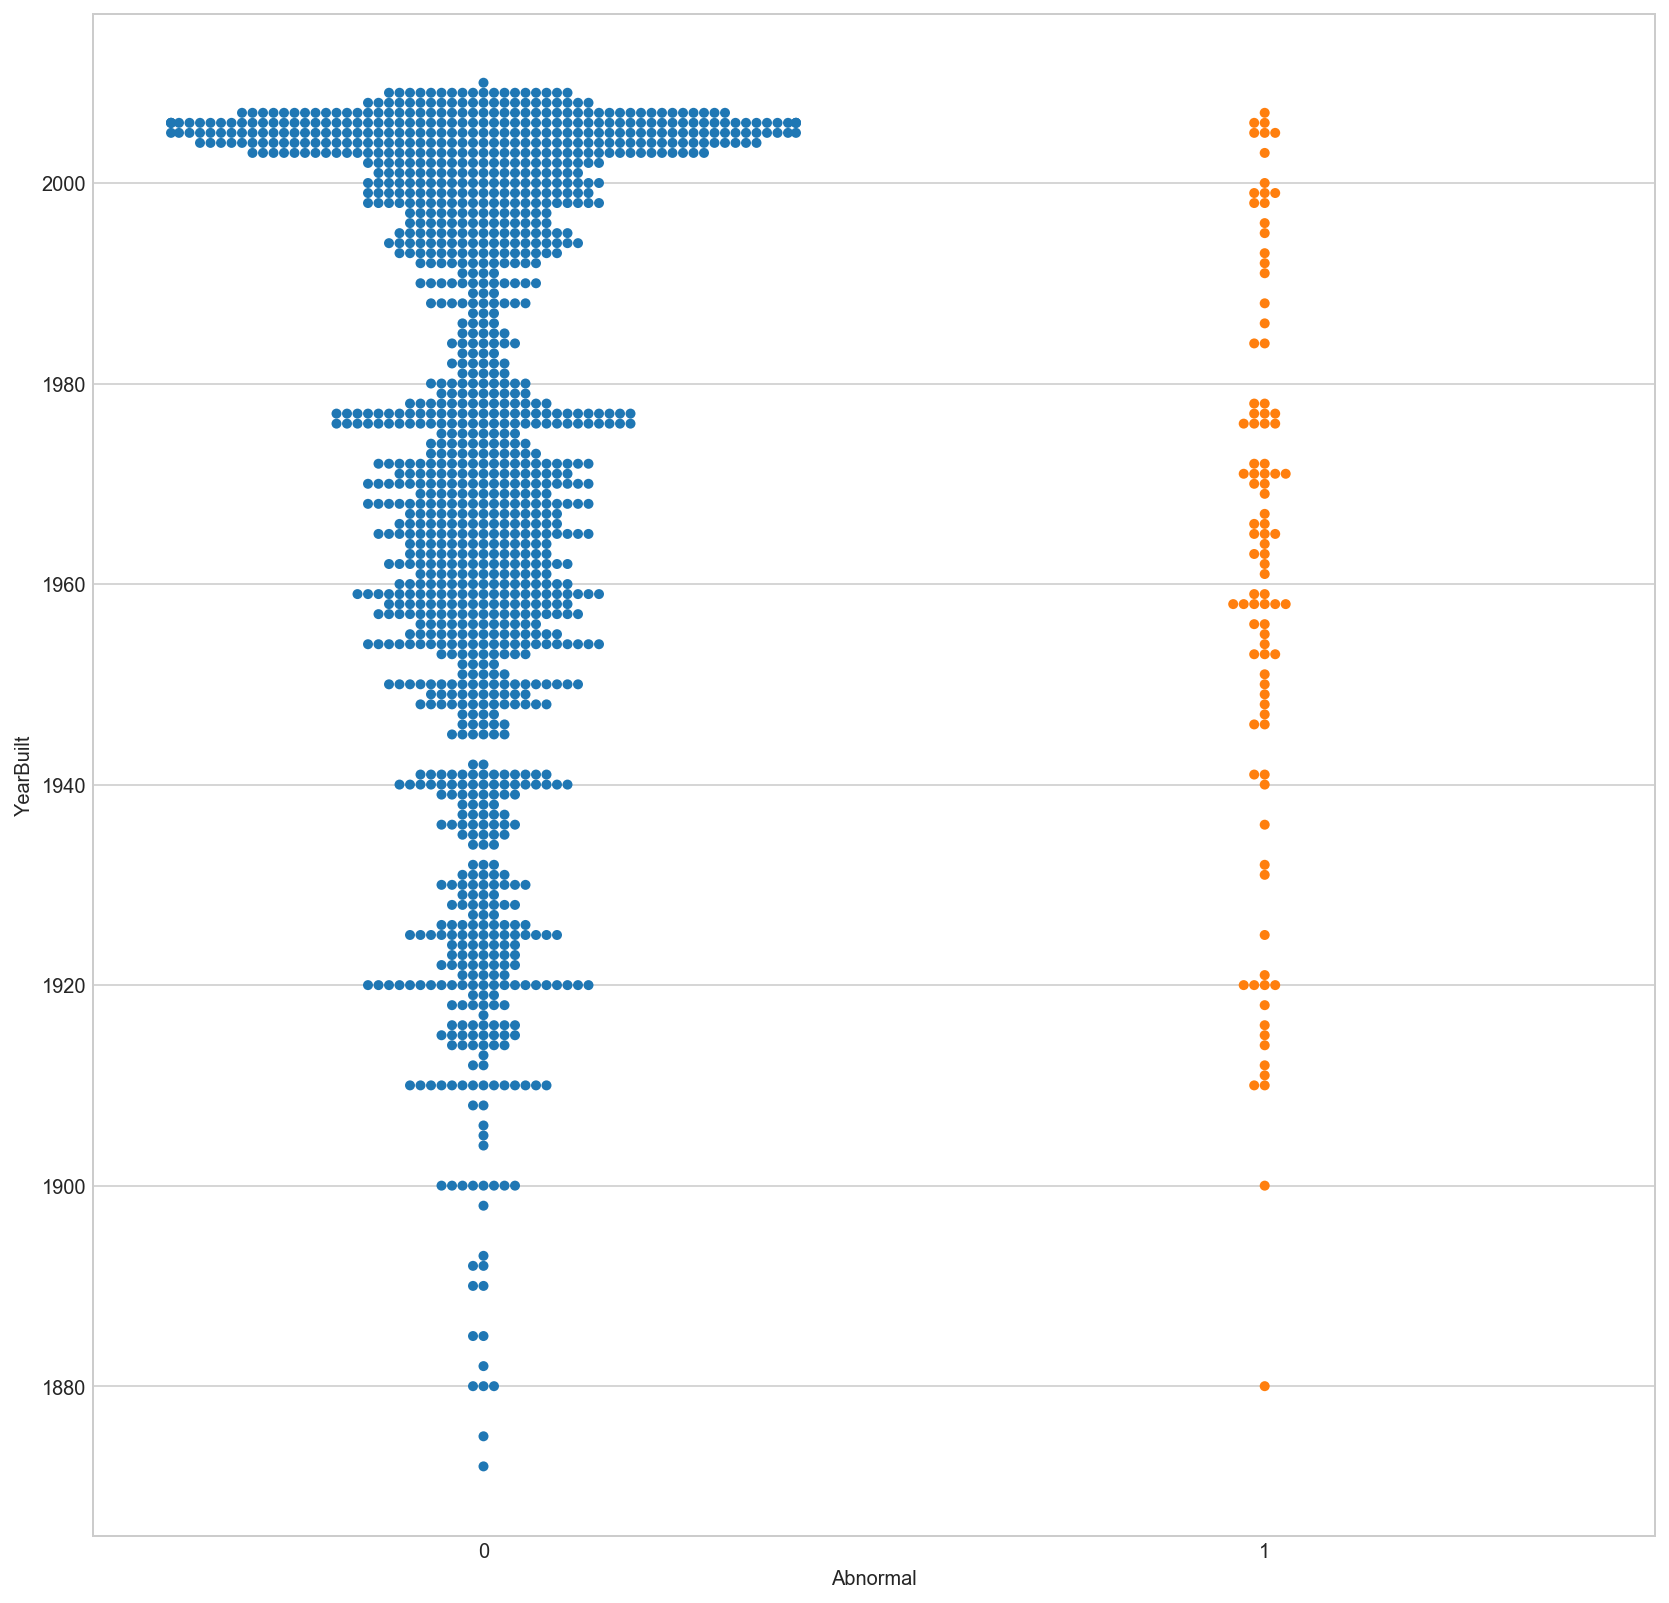

In [127]:
sns.swarmplot(x="Abnormal", y="YearBuilt", data=house)

In [ ]:
Abnormal Sales are distributed disproportionately compared to Year Built

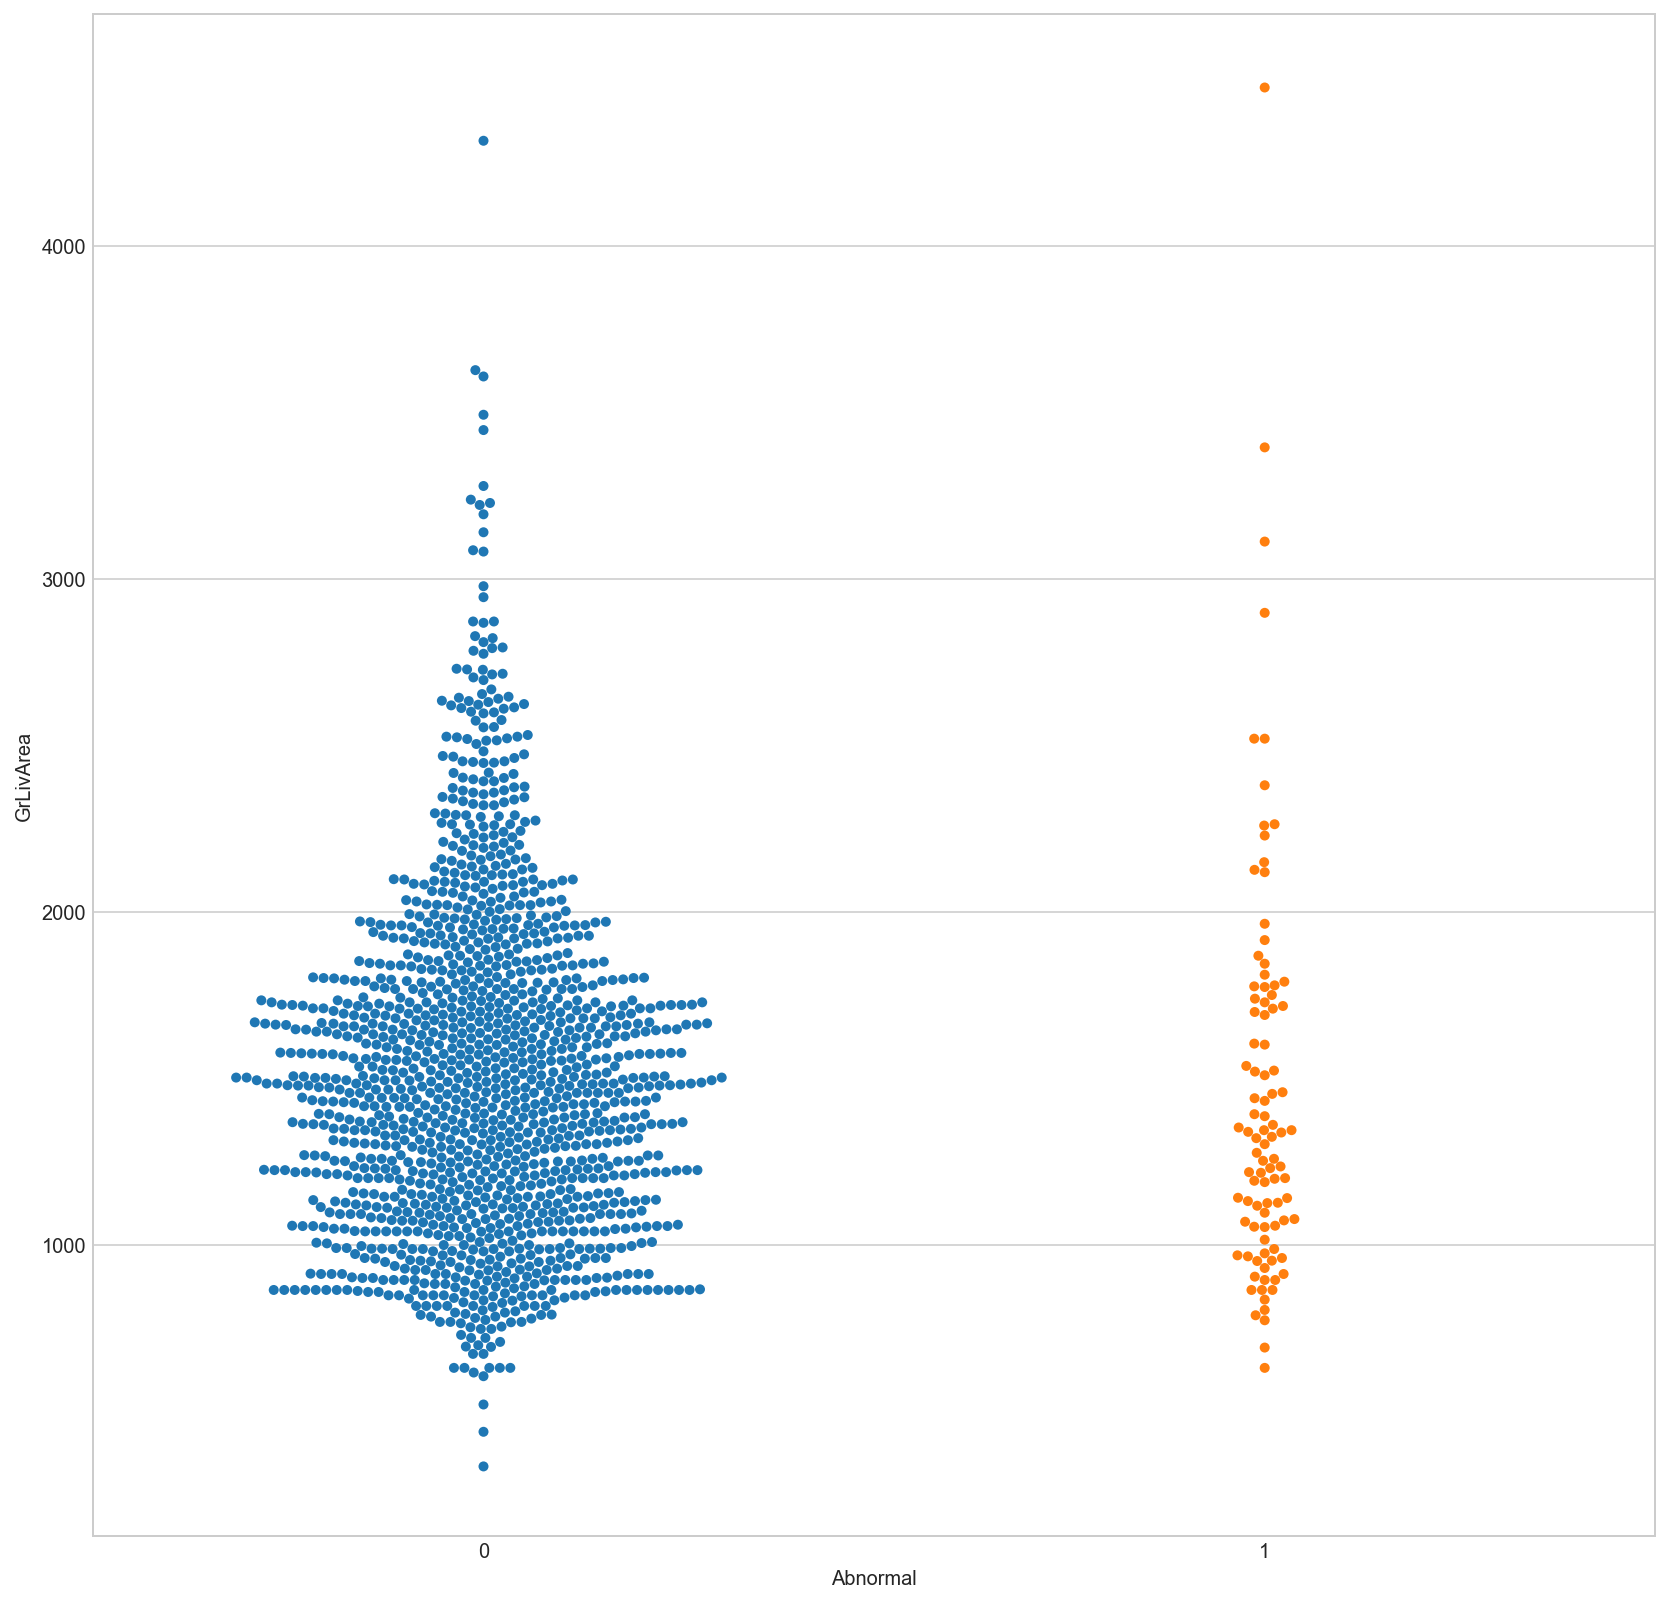

In [128]:
sns.swarmplot(x="Abnormal", y="GrLivArea", data=house)

Abnormal Sales fairly evenly spread compared to Living Area

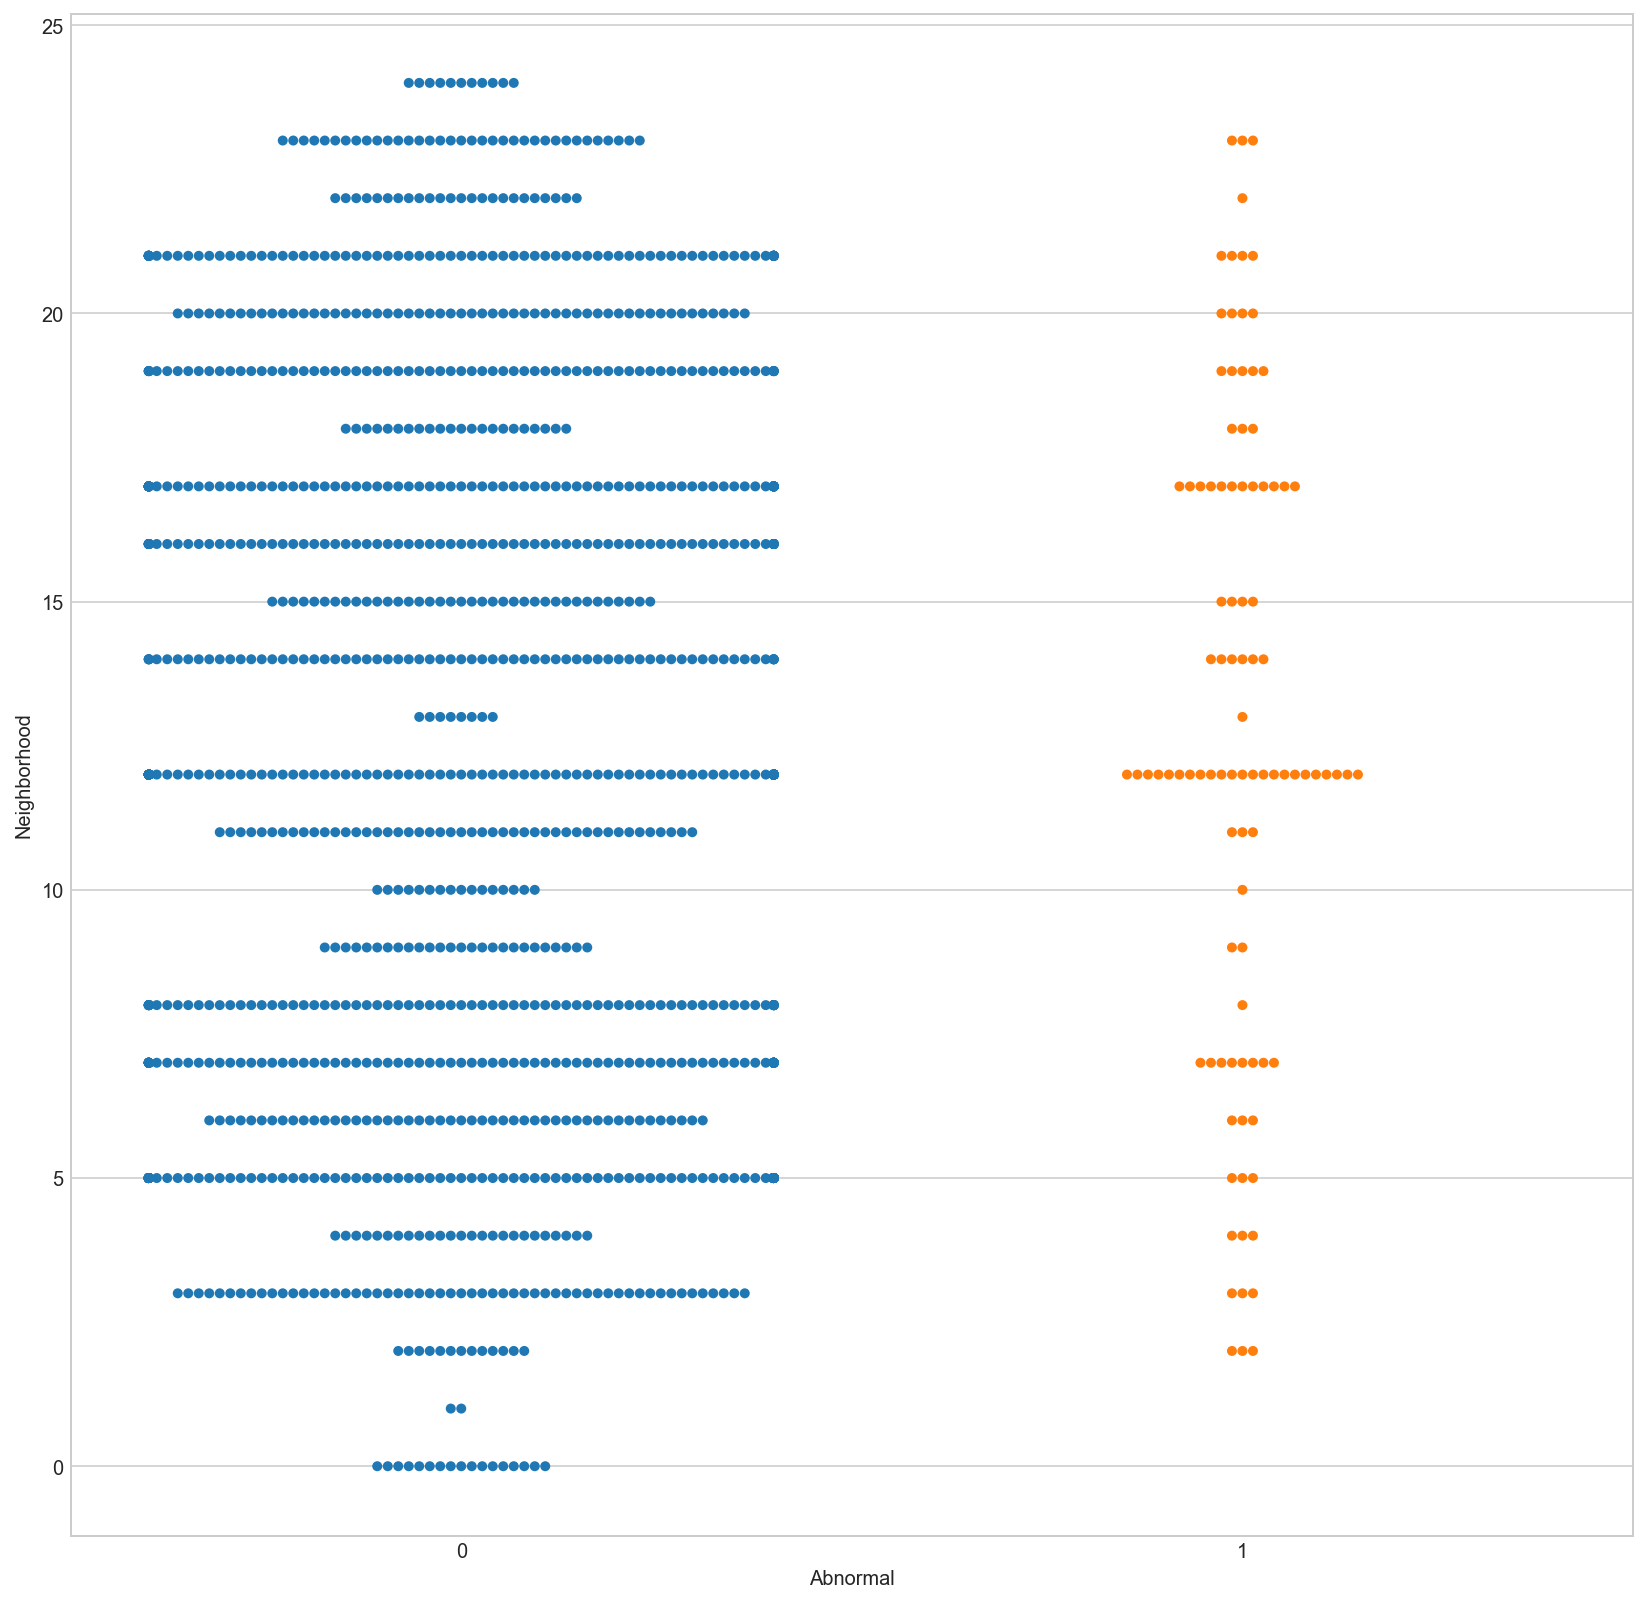

In [129]:
sns.swarmplot(x="Abnormal", y="Neighborhood", data=house)

North Ames had by far the most Abnormal Sales figures

In [130]:
y = house.Abnormal.values
X = house.drop('Abnormal', axis=1)

In [131]:
corr=house.corr()["Abnormal"]
corr[np.argsort(corr, axis=0)[::-1]]

Abnormal         1.000000
Utilities        0.098655
BsmtQual         0.084719
ExterQual        0.084003
GarageType       0.077512
HeatingQC        0.069090
EnclosedPorch    0.067170
PoolArea         0.060237
BsmtFinSF2       0.052886
LowQualFinSF     0.048852
GarageFinish     0.046270
BsmtHalfBath     0.040732
KitchenQual      0.037809
BsmtExposure     0.035660
ScreenPorch      0.028781
RoofMatl         0.026066
LandSlope        0.021946
Neighborhood     0.021899
KitchenAbvGr     0.019683
Alley            0.019370
LotShape         0.015551
Street           0.014025
MoSold           0.011232
MSSubClass       0.010680
Id               0.007864
3SsnPorch        0.006222
BsmtFinType1     0.005930
BedroomAbvGr     0.001581
FireplaceQu      0.000747
BldgType        -0.001544
ExterCond       -0.002831
MiscFeature     -0.003264
MSZoning        -0.003689
BsmtCond        -0.004798
HouseStyle      -0.004812
Functional      -0.004898
LotFrontage     -0.011185
CentralAir      -0.012706
LandContour 

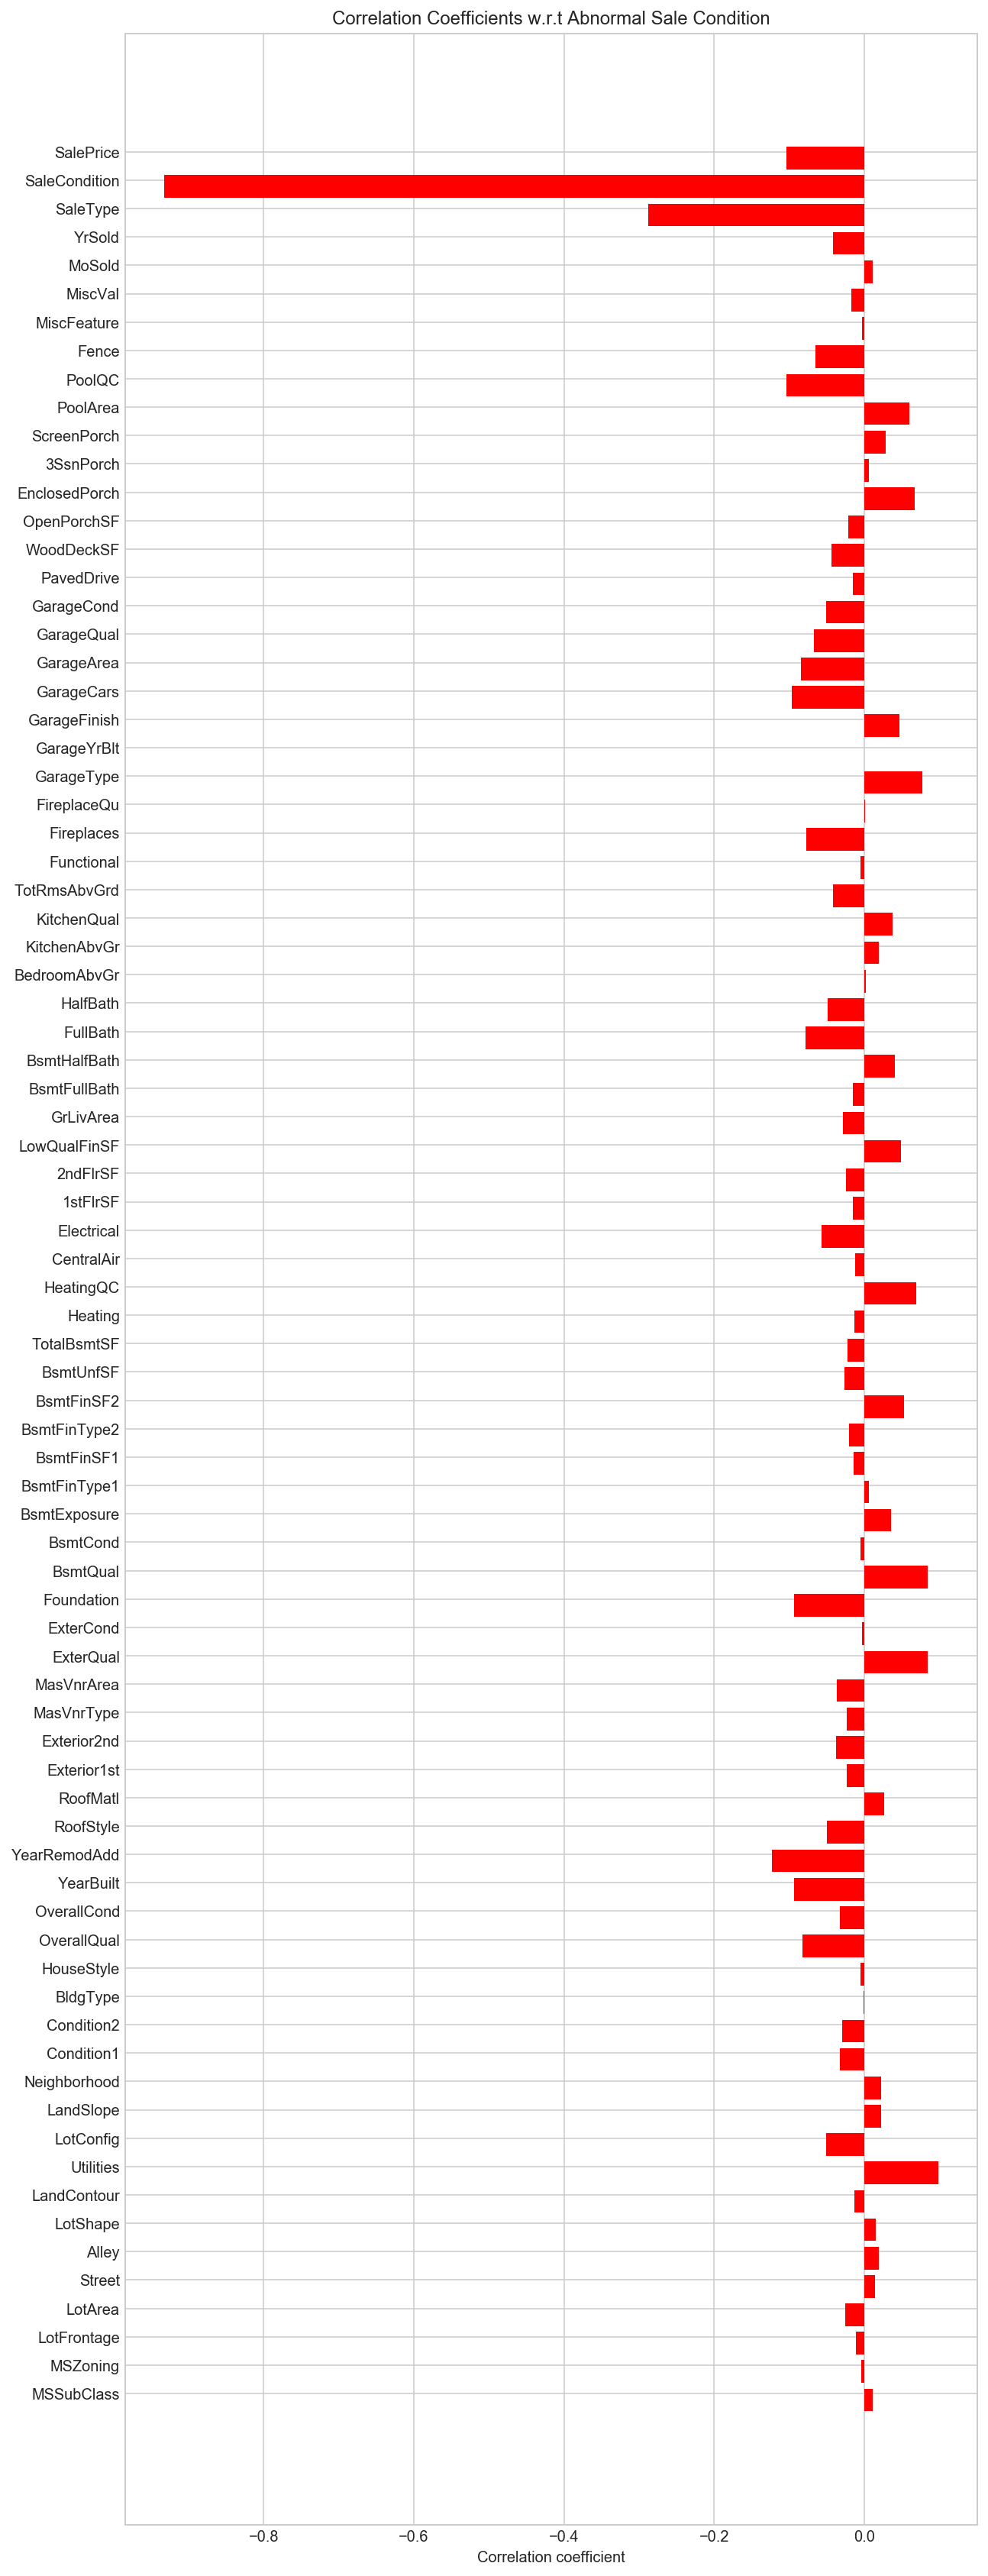

In [132]:
num_feat=house.columns[house.dtypes!=object]
num_feat=num_feat[1:-1] 
labels = []
values = []
for col in num_feat:
    labels.append(col)
    values.append(np.corrcoef(house[col].values, house.Abnormal.values)[0,1])
    
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(10,30))
rects = ax.barh(ind, np.array(values), color='red')
ax.set_yticks(ind+((width)/4.))
ax.set_yticklabels(labels, rotation='horizontal')
ax.set_xlabel("Correlation coefficient")
ax.set_title("Correlation Coefficients w.r.t Abnormal Sale Condition");

In [133]:
y_tree = house.Abnormal.values
X_tree = house[['PoolQC', 'GarageCars', 'Fireplaces', 'FullBath', 'YearRemodAdd', 'YearBuilt', 'Utilities']]

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X_tree, y_tree, test_size=0.20)

In [135]:
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(1158, 7) (1158,)
(290, 7) (290,)


In [142]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

y_tree = house.Abnormal.values
X_tree = house[['PoolQC', 'GarageCars', 'Fireplaces', 'FullBath', 'YearRemodAdd', 'YearBuilt', 'Utilities']]

#dtree = DecisionTreeRegressor(max_depth=5)
#dtree.fit(X_tree, y_tree)

clf_tree = DecisionTreeClassifier(max_depth=7)
clf_tree.fit(X_train, y_train)

print ('Score:', clf_tree.score(X_train, y_train))

Score: 0.945595854922


In [140]:
clf_tree.fit(X_test, y_test)
print ('Score:', clf_tree.score(X_test, y_test))

Score: 0.955172413793


Cross-validated scores: [ 0.92439863  0.91724138  0.91695502  0.92041522  0.92041522]
Cross-Predicted R2: 0.689024225949


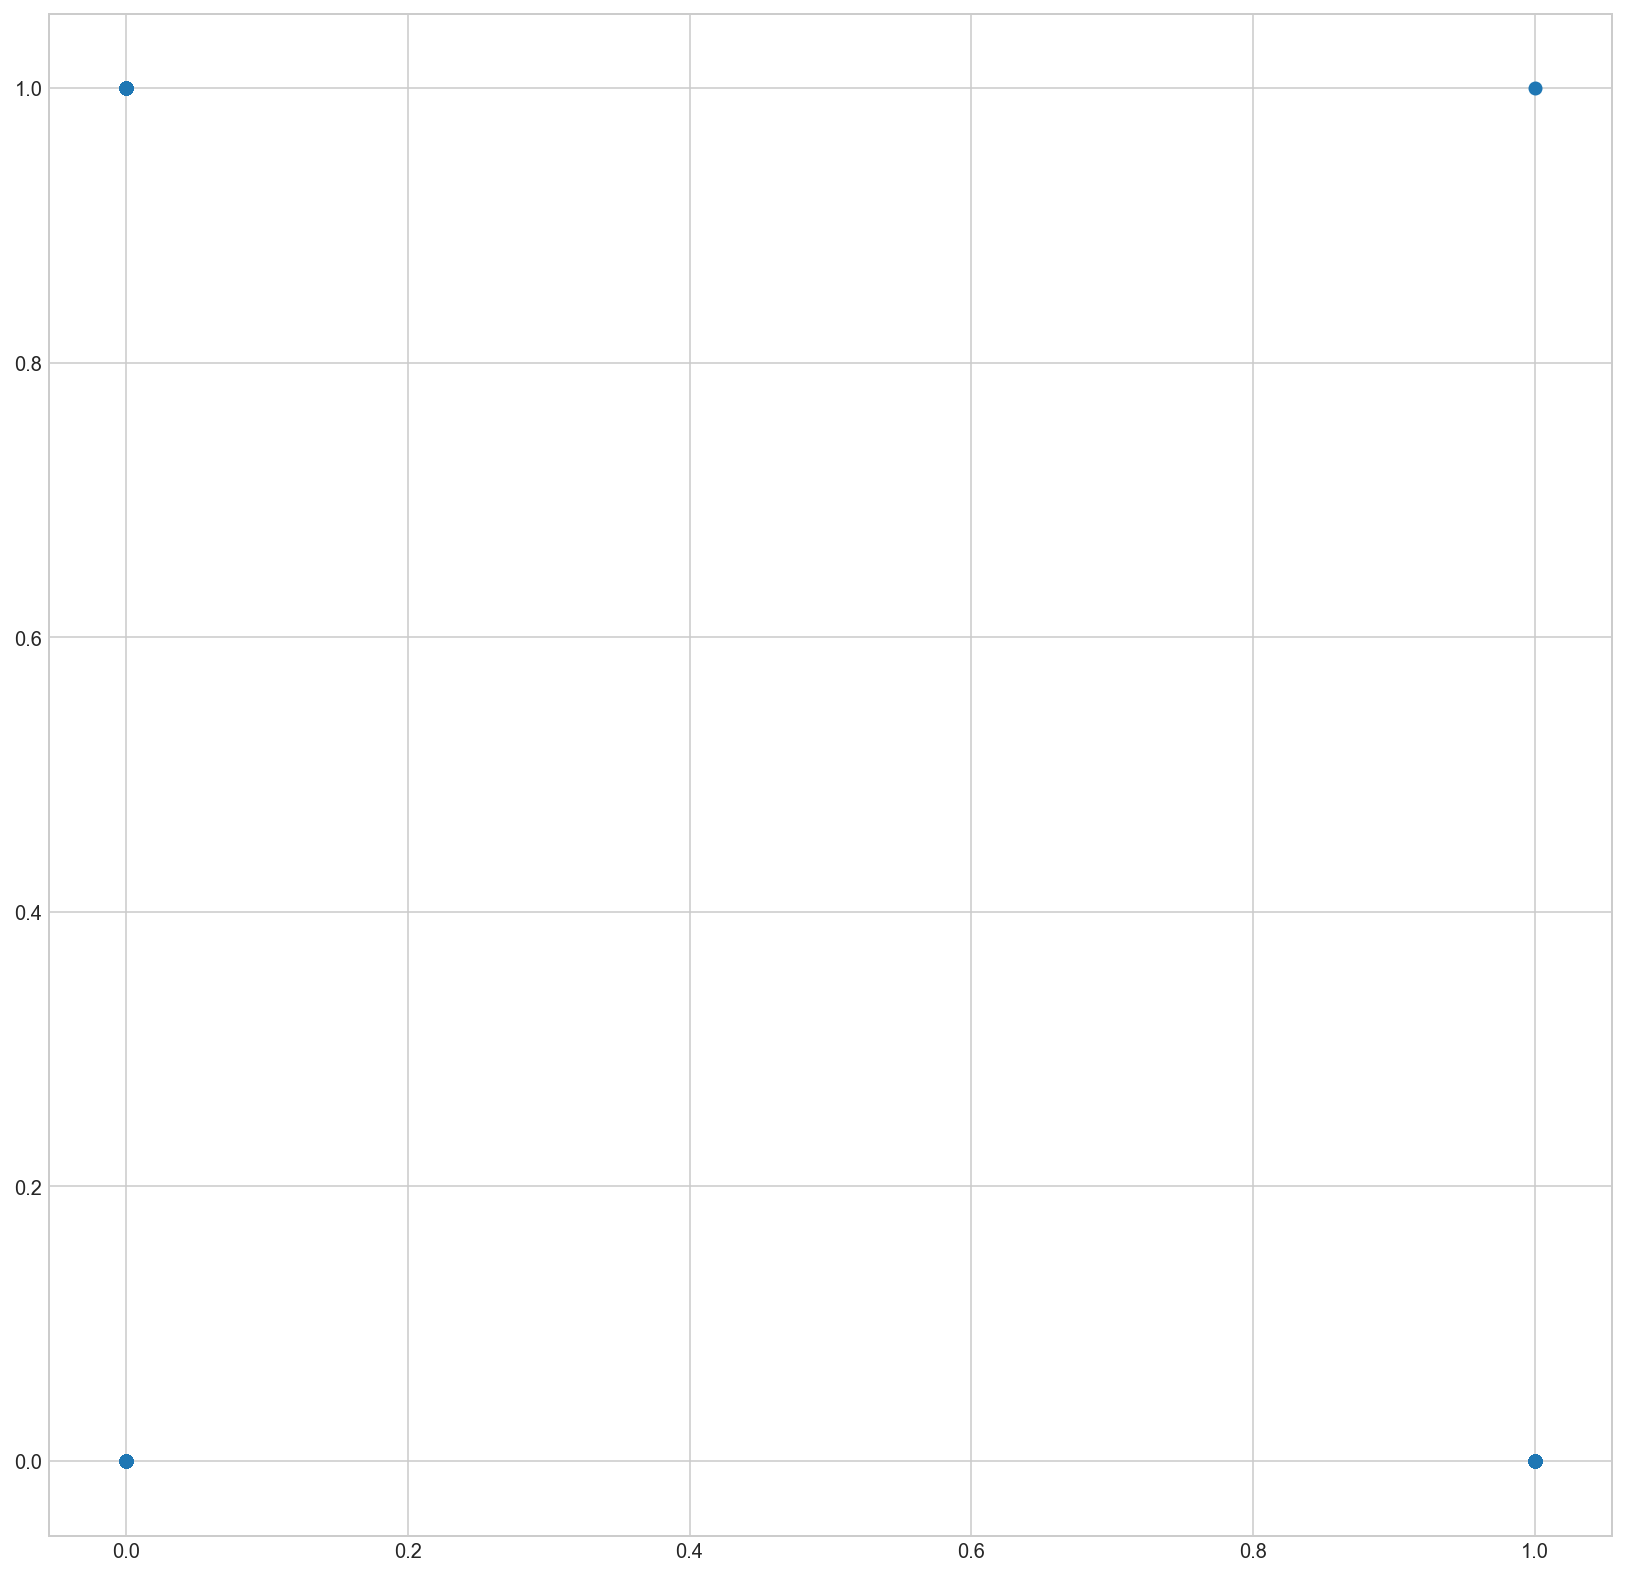

In [141]:
scores_tree = cross_val_score(clf_tree, X_tree, y_tree, cv=5)
print ("Cross-validated scores:", scores_tree)

# Make cross validated predictions on the test sets
predictions_tree = cross_val_predict(clf_tree, X_tree, y_tree, cv=5)
plt.scatter(y_tree, predictions_tree)

# manually calcualte the r2
r2_tree = metrics.r2_score(y_tree, predictions_tree)
print ("Cross-Predicted R2:", r2)

In [ ]:

from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()  

export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)  

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

In [144]:

#X, Y = b['data'], b['target']

# criterion: splitting decision function (discussed later), can be 'gini' or 'entropy'
# max_depth: the maximum number of hierarchical decision nodes (how "deep" the tree is built)
#
classifier = DecisionTreeClassifier(criterion='gini',
                                    max_depth=None)

regressor = DecisionTreeRegressor(criterion='mse',
                                  max_depth=5)

regressor.fit(X_tree, y_tree)

Y_pred = regressor.predict(X_tree)

# decision trees can give us feature importances. the higher the number the more important
# the predictor was to deciding splits at nodes.
# "The importance of a feature is computed as the (normalized) total reduction of the 
# criterion brought by that feature."
#
feature_importances = regressor.feature_importances_